# 3.7 Exercises

## Conceptual

### 1.
H0 : There is no relationship between each predictors(TV, radio, or newspaper) and response(sales) **when adjusting other variables**. (beta == 0)  

There is strong evidence that TV and radio have positive relationships with sales, but there is no statistical significant evidence that newspaper have a relationship with sales. 

### 2.
Both are non-parametric approach, but KNN classifier applies to qualitative response (classification), while KNN regression applies to quantitative response (regression).

### 3.
$Y = 50 + 20GPA + 0.07IQ + 35Level + 0.01GPA * IQ - 10GPA * Level$

(a) $50 + 10GPA + 0.07IQ + 0.01GPA*IQ + 35$ for college,  
$50 + 20GPA + 0.07IQ + 0.01GPA*IQ$ for highschool.  
iii. If GPA is high enough(i.e. GPA >= 4.0), highschool graduates earn more on average than college graduates by 5 units.

(b) $50 + 80 + 7.7 + 35 + 4.4 - 40 = 137.1$

(c) False. The t-statistic is calculated as the ratio of deviation and standard error. So unless we know standard error, we don't know its statistical significance.

### 4.

(a) We expect that linear squares training RSS would be higher than cubic regression since cubic regression is a more flexible method and there is a high n per p. 

(b) We expect that linear squares test RSS would be lower than cubic test RSS since the true form of the relationship is closer to that of linear regression.

(c) Same with (a)

(d) The answer depends on the bias-variance trade-off and the non-linearity of the true-relationship. If the true relationship is highly non-linear, then we expect that in general the cubic regression would be better. But if the true relationship is close to linear, then linear regression might still outperform since it has a lower variance and lower bias.

### 5.

Let $\sum_{i=1}^n{x_i^2} = k$,  then

$a_{i'} = \frac{x_i}{k} x_{i'}$

### 6.

If we substitue $\bar{x}$, $\bar{y}$ in (3.2), we obtain $\bar{y} = \bar{y} - \hat{\beta_1}\bar{x} + \hat{\beta_1}\bar{x}$ (by 3.4), which is true.

### 7.

By definition, $Cor(X, Y) = \frac{\sum{xy}}{\sqrt{\sum{x^2}}\sqrt{\sum{y^2}}}$  
$Cor(X, Y)^2 = \frac{(\sum{xy})^2}{\sum{x^2}\sum{y^2}}$

$$
\begin{align}
TSS &= \sum{y^2} \\
    &= Var(Y)
\end{align}
$$

$$
RSS = \sum{(y - \hat{y})^2}
$$

$$
\begin{align}
TSS - RSS &= \sum{(2y - \hat{y})\hat{y}}  \\
        &= 2\sum{y\hat{y}} - \sum{\hat{y}^2} \\
        &= 2Cov(Y, \hat{Y}) - Var(\hat{Y}) \\
        &= 2\beta_1Cov(Y, X) - \beta_1^2 Var(X) \\
        &= 2 \frac{\sum{xy}}{\sum{x^2}}Cov(Y, X) - (\frac{\sum{xy}}{\sum{x^2}})^2 \sum{x^2} \\
        &=  \frac{(\sum{xy})^2}{\sum{x^2}}
\end{align}
$$

Hence, $Cor(X,Y)^2 = \frac{TSS - RSS}{TSS} = R^2$

## Applied

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

### 8.

(a)

In [153]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [154]:
X = MS(['horsepower']).fit_transform(Auto)
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [4]:
y = Auto['mpg']
model = sm.OLS(y, X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i.  
Yes. The p-value for horsepower is zero, showing that there is a significant relationship between the predictor and the response.  

ii.  
When horsepower increases by 1 unit, the mpg decreases by 0.1578 unit.  

iii.  
Negative.  

iv.  
The predicted value is 24.47, confidence intervals are [23.97, 24.96] and prediction intervals are [14.81, 34.12].

In [ ]:
prediction = result.get_prediction((1, 98))
prediction.predicted_mean

array([24.46707715])

In [ ]:
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [ ]:
prediction.conf_int(alpha=0.05, obs=True)

array([[14.80939607, 34.12475823]])

(b)

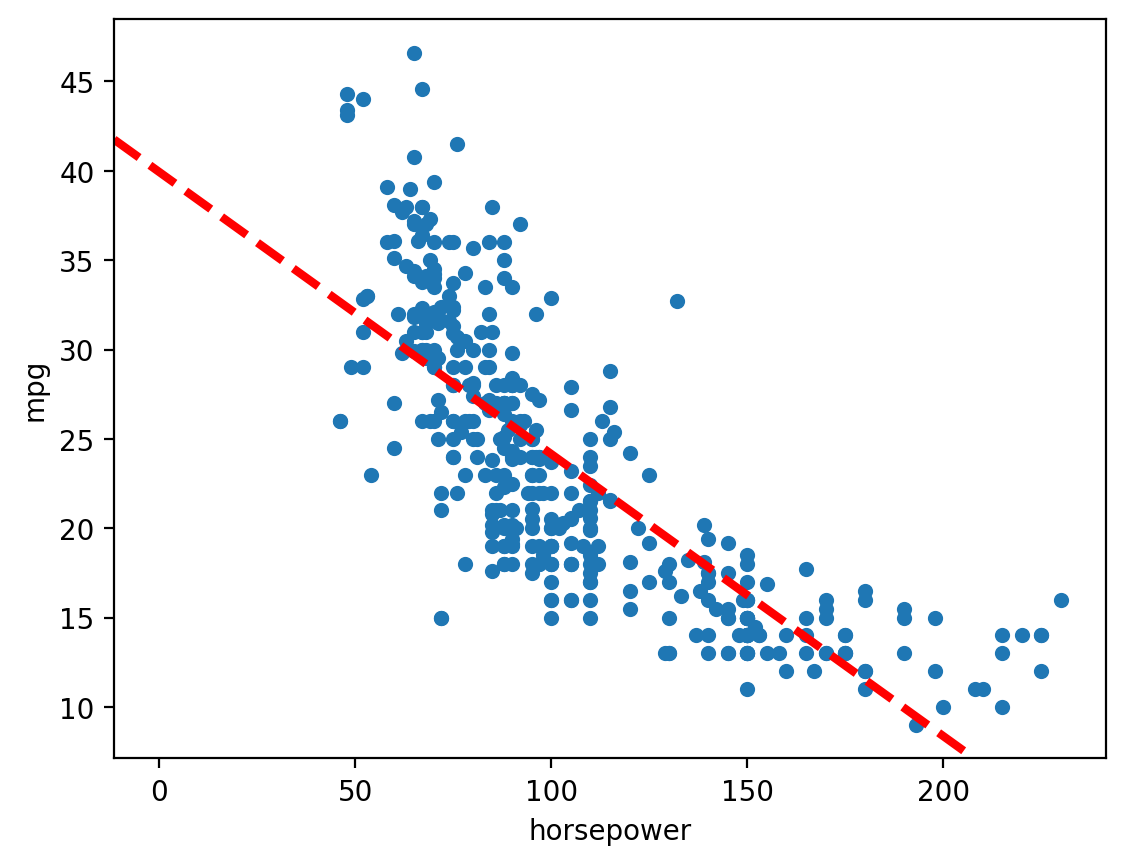

In [9]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.axline((0, result.params.iloc[0]), slope=result.params.iloc[1], c='r', ls='--', linewidth=3);

(c)

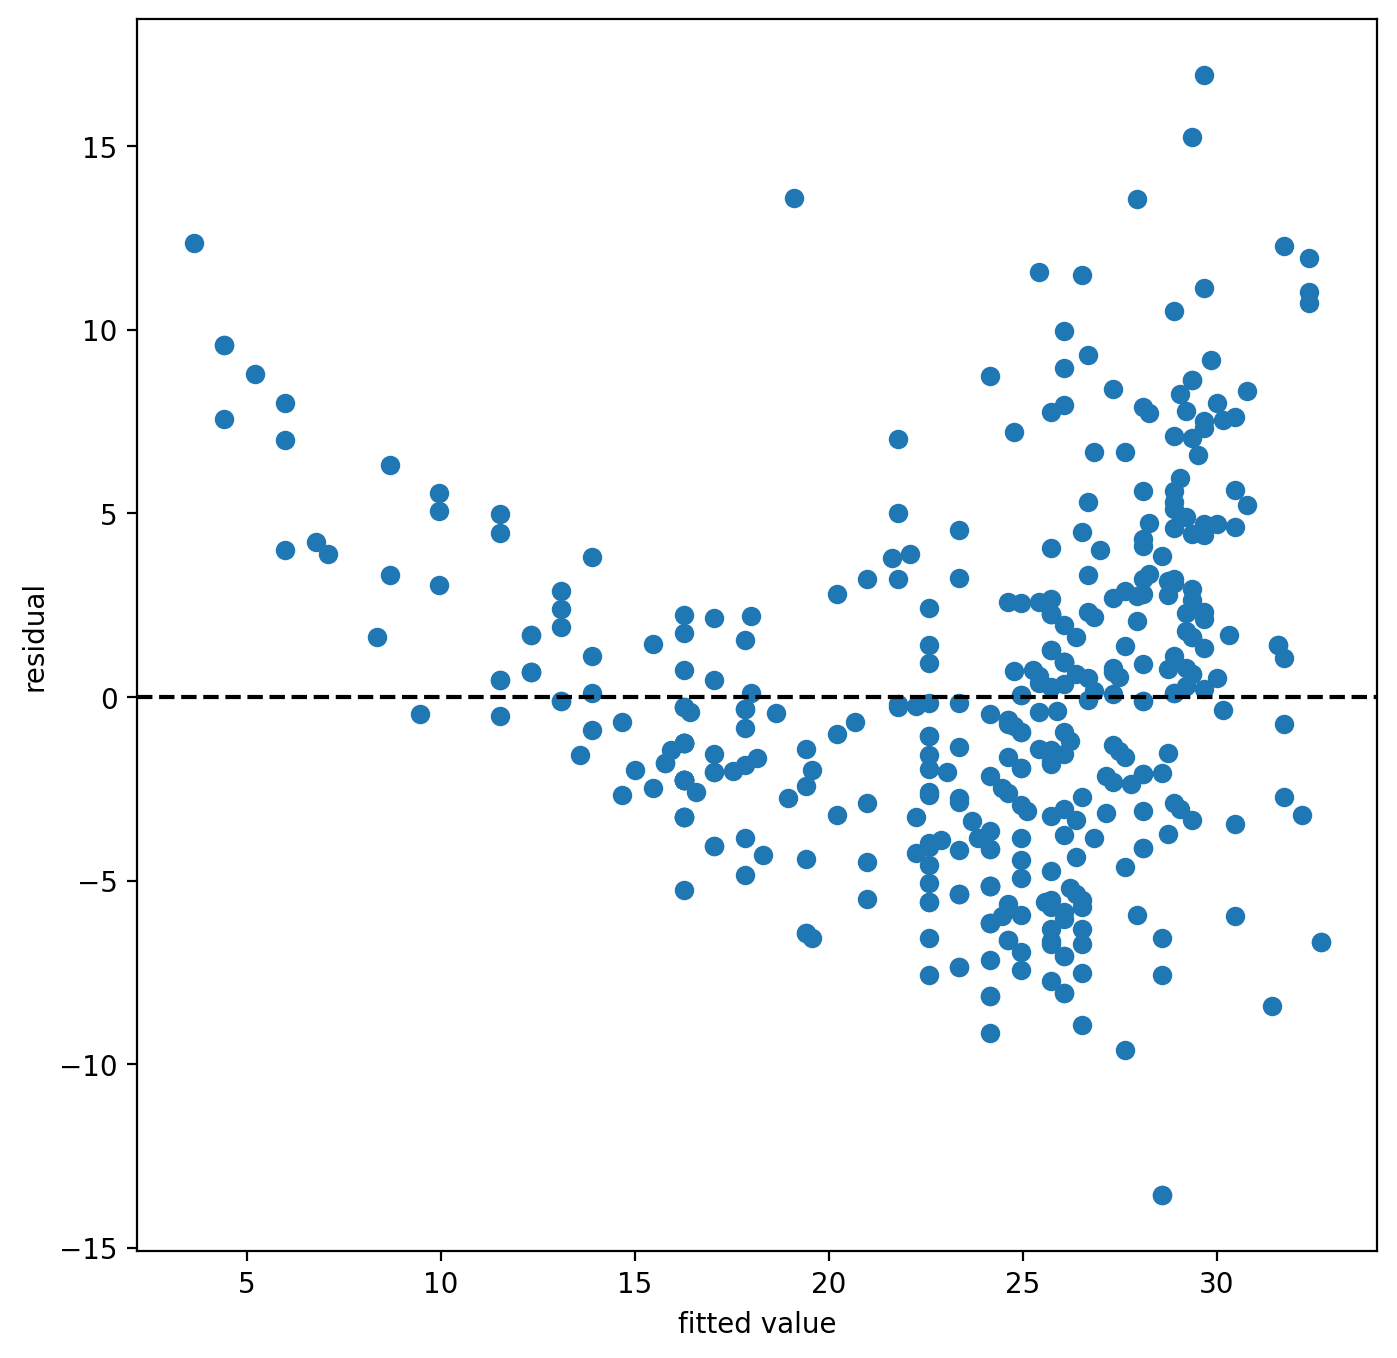

In [10]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('fitted value')
ax.set_ylabel('residual')
ax.axhline(0, c='k', ls='--');

There seems to be a non-linear relationship between the predictor and the response.

### 9.

(a)

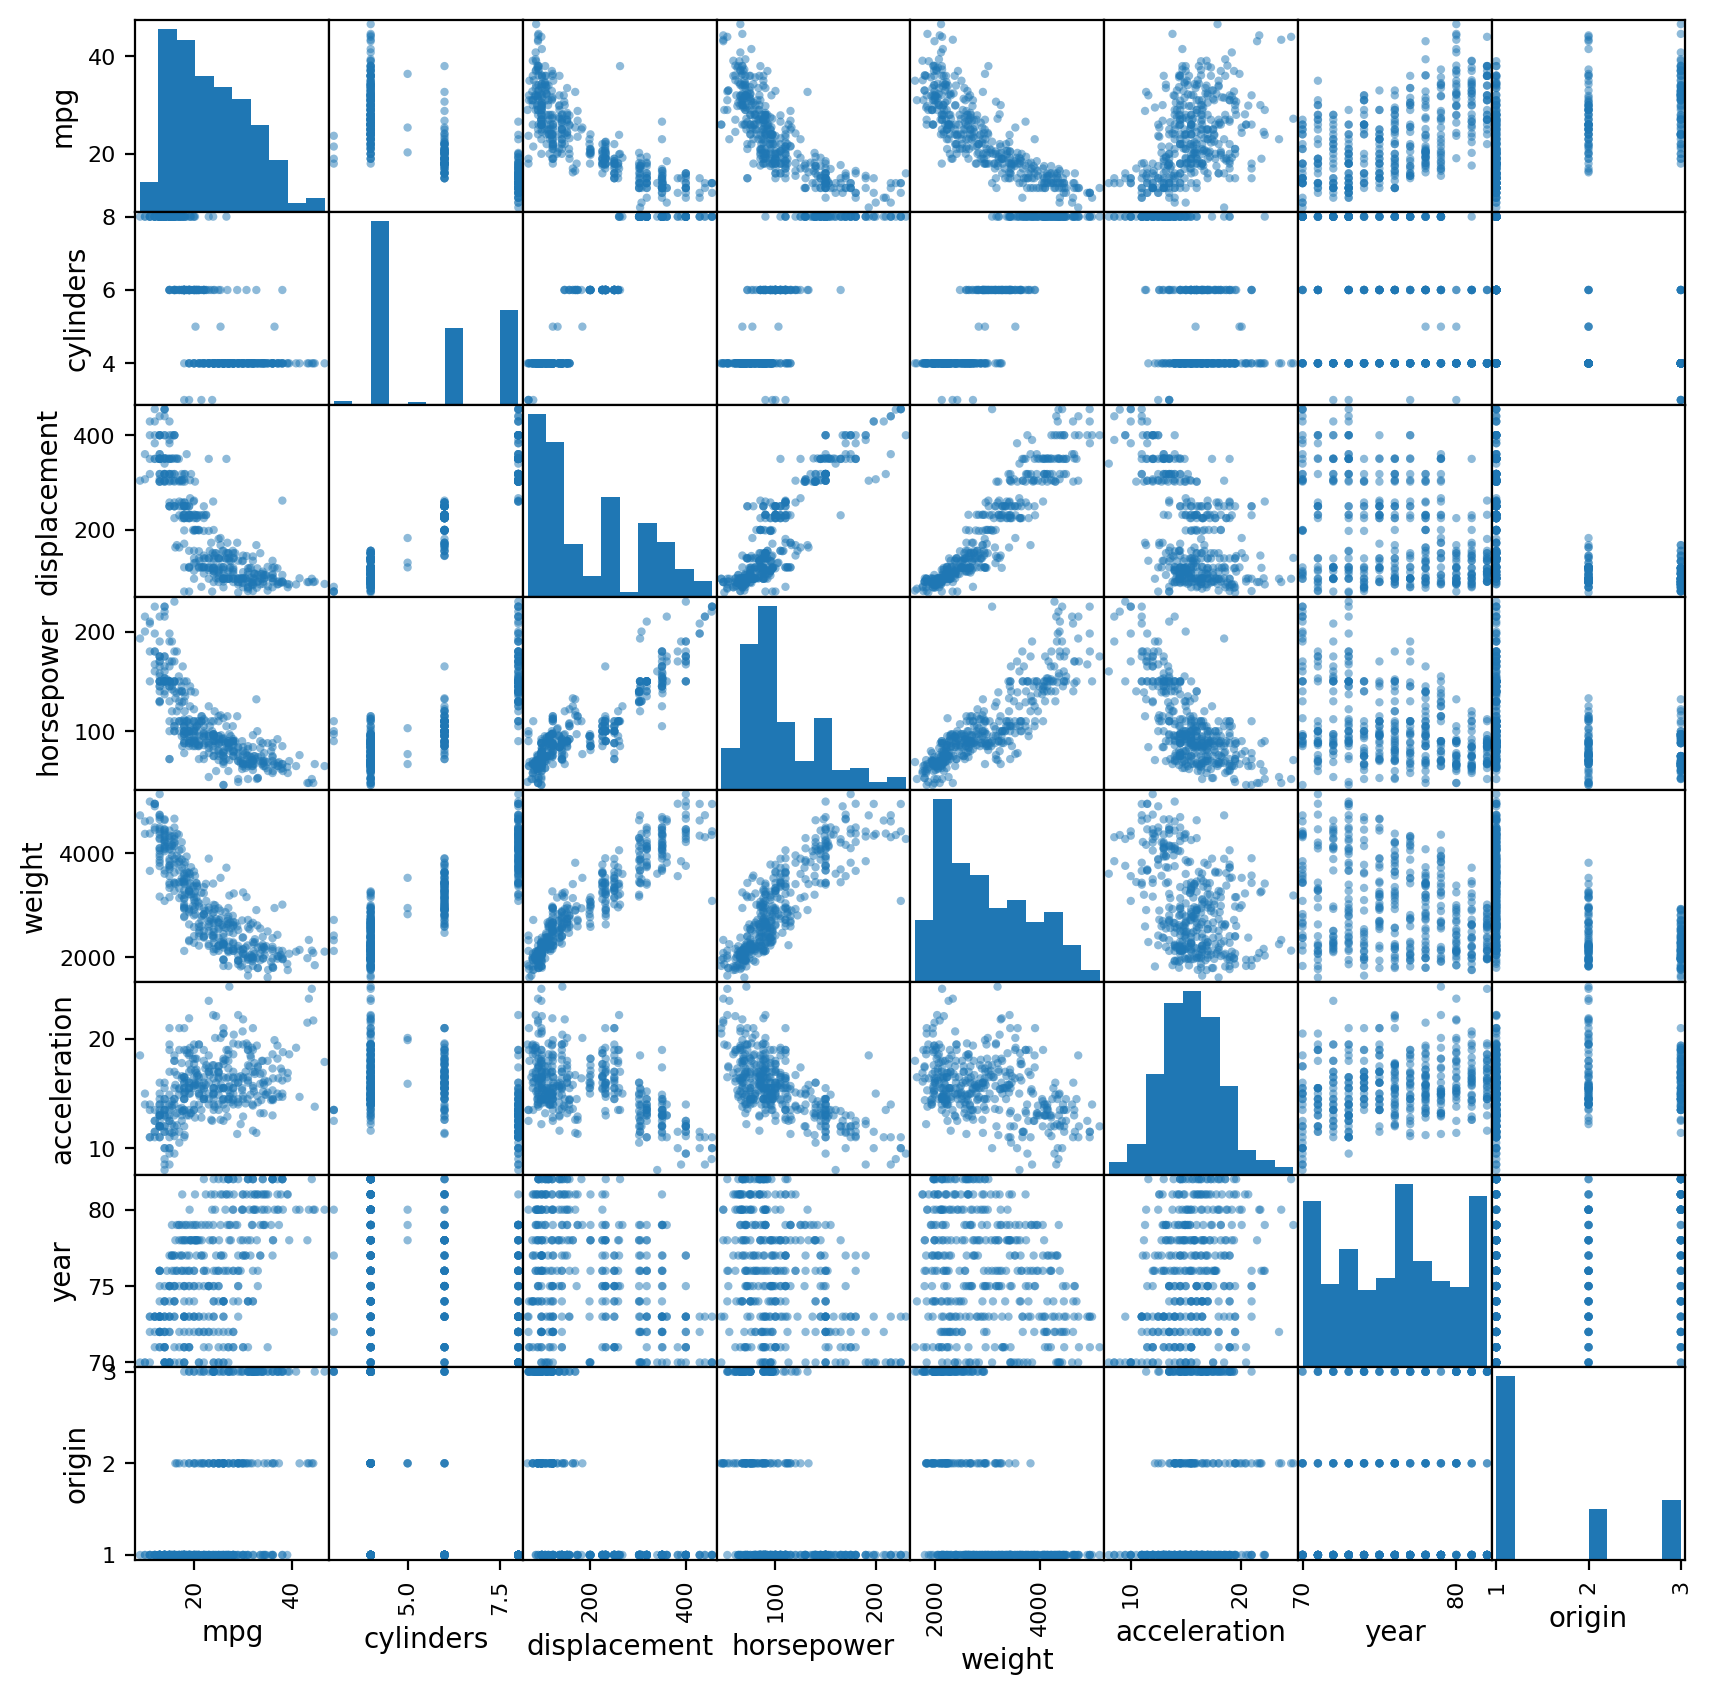

In [11]:
pd.plotting.scatter_matrix(Auto, figsize=(10, 10));

(b)

In [12]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c)

In [13]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [14]:
allvar = Auto.columns.drop('mpg')
X2 = MS(allvar).fit_transform(Auto)
model2 = sm.OLS(y, X2)
result2 = model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


There is no significant relationship between horsepower and mpg after adjusting other variables.

i.

There is a relationship since the p-value corresponding the F-statistic is zero.

ii.  
displacement, weight, year, origin

iii.  
As year increases by 1 unit, the mpg increases by 0.75, when the other variables are held constant.

(d)

13

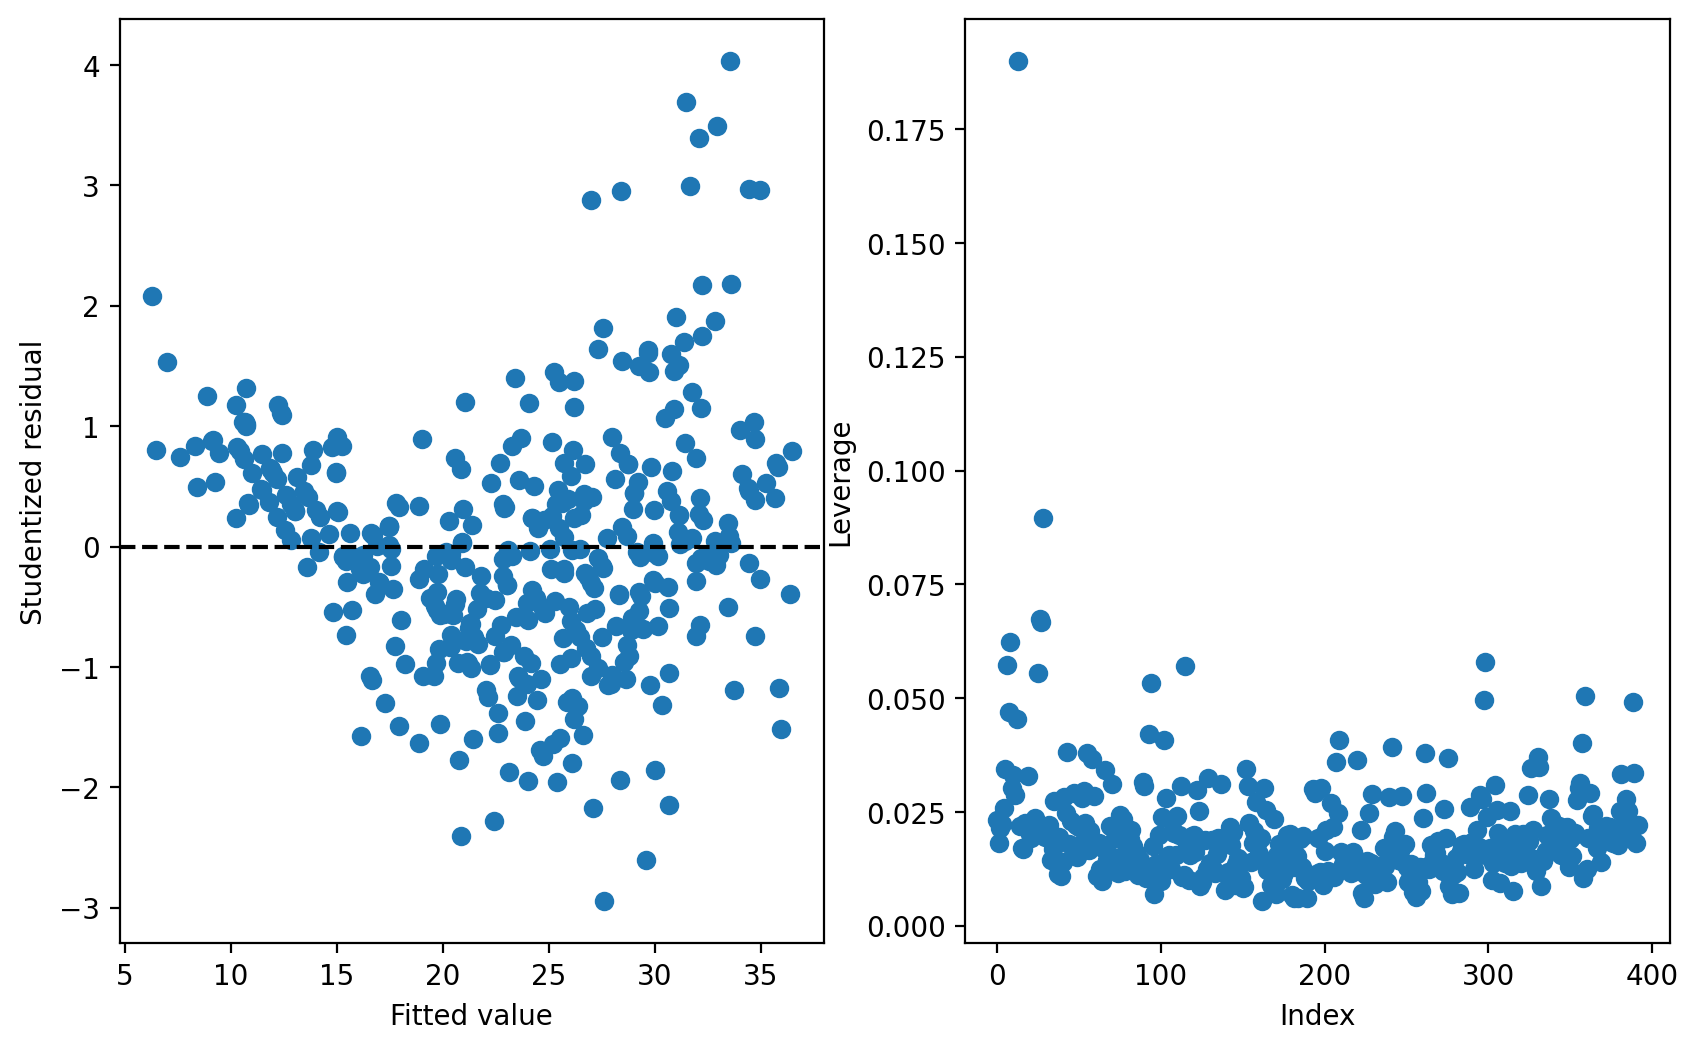

In [16]:
ax = subplots(figsize=(10, 6), ncols=2)[1]
ax[0].scatter(result2.fittedvalues, result2.outlier_test()['student_resid'])
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Studentized residual')
ax[0].axhline(0, c='k', ls='--');

ax[1].scatter(np.arange(X.shape[0]), result2.get_influence().hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(result2.get_influence().hat_matrix_diag)

In studentized residual plot, there are some outliers whose values are greater than 3. But this results from the non-linearity of the data, not data collection errors.   
In leverage plot, there is a very high-leverage point whose index is 13.

(e)

In [17]:
terms = allvar.drop(['cylinders', 'horsepower', 'acceleration'])  # drop variables which are not associated with response
X3 = MS(list(terms) + [('displacement', 'weight'),
                       ('displacement', 'origin'),
                       ('weight', 'year'),
                       ('year', 'origin'),
                       ('weight', 'origin')]).fit_transform(Auto)
result3 = sm.OLS(y, X3).fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,-33.247100,22.463000,-1.480,0.140
displacement,-0.079800,0.018000,-4.550,0.000
weight,0.004900,0.006000,0.816,0.415
year,1.121000,0.285000,3.937,0.000
origin,-7.125100,5.254000,-1.356,0.176
displacement:weight,0.000018,0.000003,6.454,0.000
displacement:origin,0.013300,0.013000,1.050,0.294
weight:year,-0.000200,0.000075,-2.395,0.017
year:origin,0.106200,0.066000,1.615,0.107
weight:origin,-0.001000,0.001000,-1.054,0.292


displacement : weight,  
...  
(horsepower:origin, horsepower:year)

(f)

In [18]:
X4 = MS([poly('weight', degree=2), 'year', 'displacement', 'origin', ('displacement', 'weight'), ('weight', 'year')]).fit_transform(Auto)
result4 = sm.OLS(y, X4).fit()
summarize(result4)

,coef,std err,t,P>|t|
intercept,-34.95100,3.917000,-8.923,0.000
"poly(weight, degree=2)[0]",168.36870,83.458000,2.017,0.044
"poly(weight, degree=2)[1]",10.50280,9.285000,1.131,0.259
year,1.48890,0.174000,8.556,0.000
displacement,-0.03720,0.023000,-1.646,0.101
origin,0.37490,0.254000,1.473,0.141
displacement:weight,0.00001,0.000006,1.605,0.109
weight:year,-0.00020,0.000062,-3.950,0.000


In [19]:
X5 = MS([poly('displacement', degree=2), 'year', 'weight', 'origin', ('displacement', 'weight'), ('weight', 'year')]).fit_transform(Auto)
result5 = sm.OLS(y, X5).fit()
summarize(result5)

,coef,std err,t,P>|t|
intercept,-73.135000,13.205000,-5.538,0.000
"poly(displacement, degree=2)[0]",-134.096300,27.726000,-4.837,0.000
"poly(displacement, degree=2)[1]",-2.966300,6.461000,-0.459,0.646
year,1.500700,0.174000,8.617,0.000
weight,0.008700,0.005000,1.753,0.080
origin,0.365300,0.259000,1.409,0.160
displacement:weight,0.000019,0.000004,4.467,0.000
weight:year,-0.000200,0.000062,-4.047,0.000


In [20]:
X6 = MS([poly('horsepower', degree=2), 'displacement']).fit_transform(Auto)
result6 = sm.OLS(y, X6).fit()
summarize(result6)

,coef,std err,t,P>|t|
intercept,30.0318,0.907,33.101,0.0
"poly(horsepower, degree=2)[0]",-57.2436,9.378,-6.104,0.0
"poly(horsepower, degree=2)[1]",39.0649,4.151,9.411,0.0
displacement,-0.0339,0.005,-7.455,0.0


In [21]:
anova_lm(result, result6)  # horsepower vs hoserpower poly

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,388.0,6509.496707,2.0,2876.419165,85.724802,1.471385e-31


In [22]:
print(result.rsquared, result6.rsquared)

0.6059482578894348 0.7267098328374388


If we include degree 2 polynomials of horsepower to the model, the performance of the model significantly increases.

### 10.
(a)

In [23]:
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


(b)

In [24]:
X_c = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y_c = Carseats['Sales']
model_c = sm.OLS(y_c, X_c)
result_c = model_c.fit()
summarize(result_c)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


The price and the sales have a negative relationship.  If the US variable eqauls 'Yes', then the sales is larger by 1.2 on average. But whether or not urban equals 'Yes' doesn't make any significant difference on sales.

(c)

(d)

Price, US

(e)

In [25]:
X_c_new = MS(['Price', 'US']).fit_transform(Carseats)
result_c_new = sm.OLS(y_c, X_c_new).fit()
summarize(result_c_new)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


(f)

In [26]:
print('R^2 score for (a) is {0:.5}, for (e) is {1:.5}'.format(result_c.rsquared, result_c_new.rsquared))
print('RSE for (a) is {0:.5}, for (e) is {1:.5}'.format(np.sqrt(result_c.scale), np.sqrt(result_c_new.scale)))

R^2 score for (a) is 0.23928, for (e) is 0.23926
RSE for (a) is 2.4725, for (e) is 2.4694


When removing the Urban variable, R^2 score almost doesn't decrease, but RSE also decreases. So (e) is a better model.

(g)

In [27]:
result_c_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           2.66e-24
Time:                        20:07:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Confidence intervals for intercept : [11.79, 14.27],  
for Price : [-0.065, -0.044],  
for US : [0.692, 1.708]

(e)

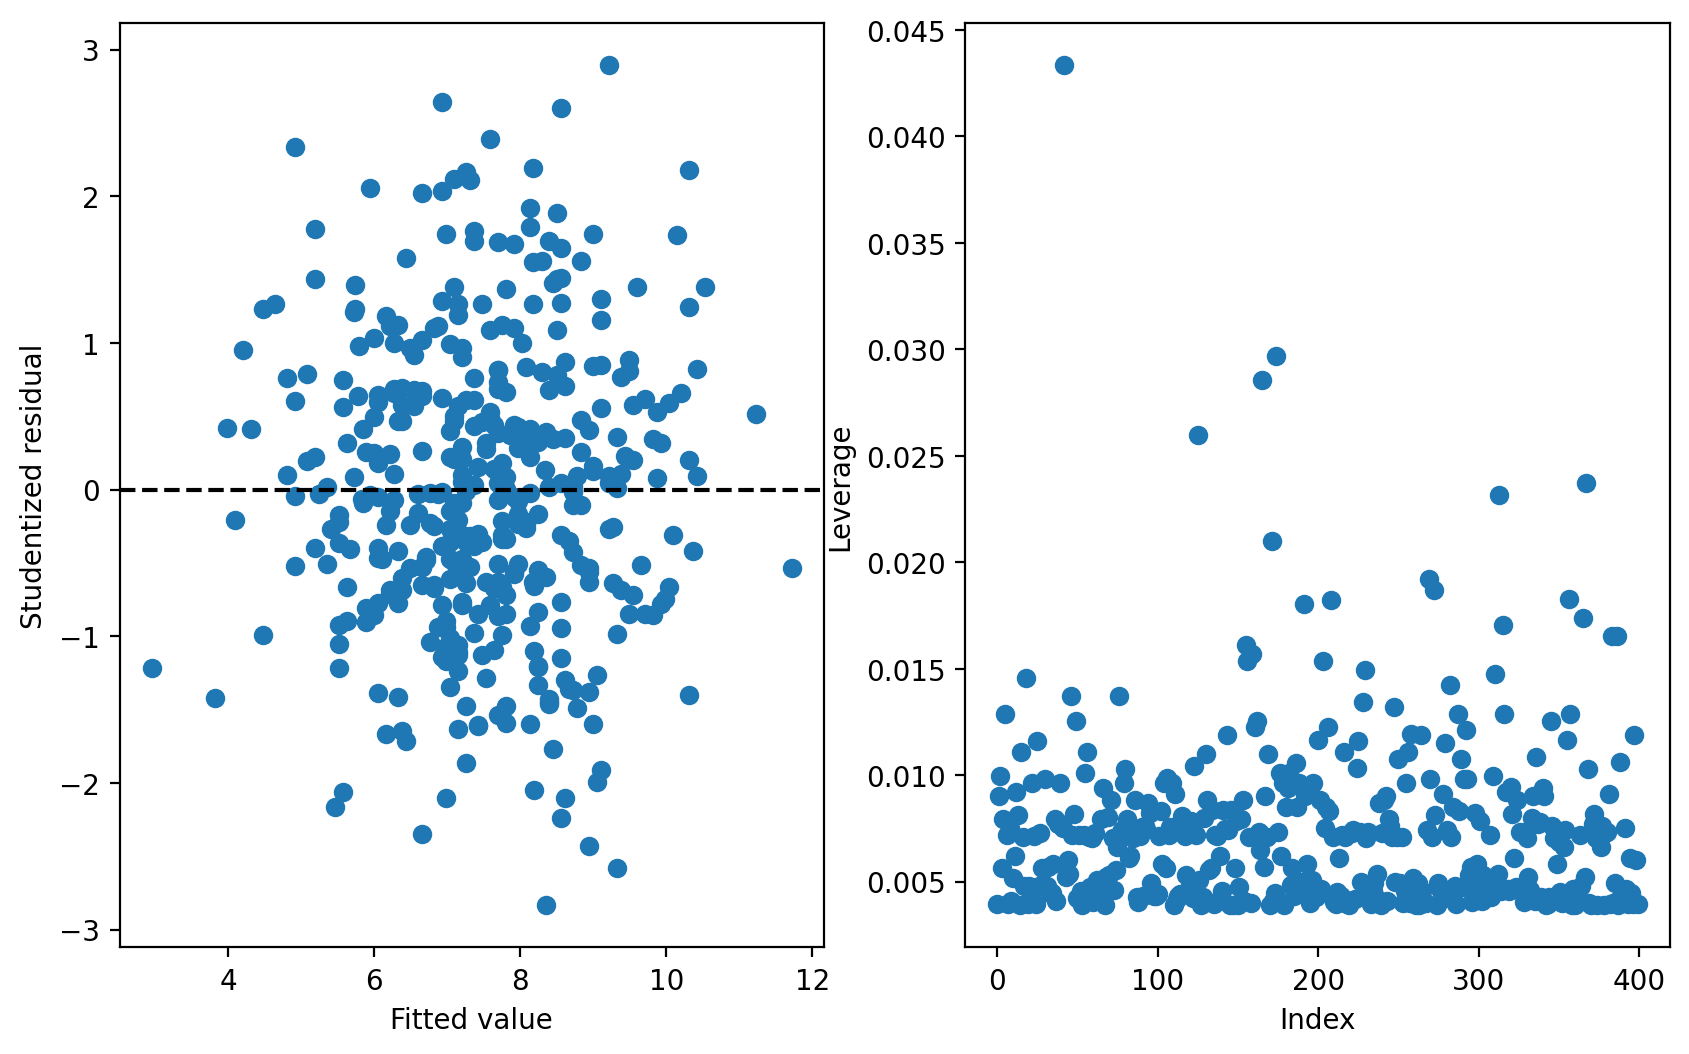

In [28]:
axes = subplots(figsize=(10, 6), ncols=2)[1]

ax1 = axes[0]
ax1.scatter(result_c_new.fittedvalues, result_c_new.outlier_test()['student_resid'])
ax1.set_xlabel('Fitted value')
ax1.set_ylabel('Studentized residual')
ax1.axhline(0, c='k', ls='--')

ax2 = axes[1]
ax2.scatter(np.arange(X_c_new.shape[0]), result_c_new.get_influence().hat_matrix_diag)
ax2.set_xlabel('Index')
ax2.set_ylabel('Leverage');

There is no outlier, but there is a high leverage point.

### 11.

In [157]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

(a)

In [158]:
X_ni = pd.DataFrame({'x': x})
y_ni = pd.DataFrame({'y': y})

In [159]:
model_ni = sm.OLS(y_ni, X_ni)
result_ni = model_ni.fit()
summarize(result_ni)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


When x increases by 1 unit, y increases by 1.9762 unit.

(b)

In [32]:
model_ni_inv = sm.OLS(X_ni, y_ni)
result_ni_inv = model_ni_inv.fit()
summarize(result_ni_inv)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


When y increases by 1 unit, x increases by 0.3757 unit.

(c)  
Each estimation of beta is:
$$(a) = \frac{Cov(X, Y)}{Var(X)}$$
$$(b) = \frac{Cov(X, Y)}{Var(Y)}$$
or, $(a) * ||x||^2 = (b) * ||y||^2$

(d)
$$
\begin{align}
t &= \sqrt{\frac{{\hat{\beta}}^2(n-1) \sum_{i'=1} ^n {x_{i'}^2}} {\sum_{i=1}^n {(y_i - x_i \hat{\beta})^2}}} \\
    &= \sqrt{\frac{(n-1)\frac{\left(\sum_{i=1}^n{x_i y_i}\right)^2}{\sum_{i=1}^n {x_i^2}}} {\sum_{i=1}^n ({y_i^2 - 2\hat{\beta}x_i y_i + {\hat{\beta}}^2 x_i^2})}} \\
    &= \frac{(\sqrt{n-1}) \sum_{i=1}^n{x_i y_i}} {\sqrt{(\sum_{i=1}^n{x_i^2}) (\sum_{i=1}^n {y_i^2}) - (\sum_{i=1}^n {x_i y_i})^2}}
\end{align}
$$

In [33]:
n = 100
t = np.sqrt(n-1) * x.dot(y) / np.sqrt(x.dot(x) * y.dot(y) - (x.dot(y))**2)
t

16.898417063035094

(e)

Since x and y are symmetric in (d), t-statistics of regression of y onto x and regression of x onto y are the same.

(f)

In [34]:
X = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                  'x': x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [35]:
summarize(sm.OLS(y, X).fit())

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [36]:
Y = pd.DataFrame({'intercept': np.ones(y.shape[0]),
                  'y': y})
Y

,intercept,y
0,1.0,0.039887
1,1.0,2.505681
2,1.0,0.535282
3,1.0,-1.937161
4,1.0,3.029555
...,...,...
95,1.0,-6.119176
96,1.0,0.832327
97,1.0,0.234106
98,1.0,-2.302292


In [37]:
summarize(sm.OLS(x, Y).fit())

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


t-statistics for two regression are both 16.734 

### 12.

(a)  
$||x||^2 = ||y||^2$

(b)

Problem 11.

(c)

In [38]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = rng.permutation(x)

In [39]:
summarize(sm.OLS(y, pd.DataFrame({'x': x})).fit())

,coef,std err,t,P>|t|
x,-0.0565,0.1,-0.563,0.575


In [40]:
summarize(sm.OLS(x, pd.DataFrame({'y': y})).fit())

,coef,std err,t,P>|t|
y,-0.0565,0.1,-0.563,0.575


### 13.

In [41]:
rng = np.random.default_rng(1)

(a)

In [42]:
x = rng.normal(0, 1, size=100)

(b)

In [43]:
eps = rng.normal(0, 0.25, size=100)

(c)

In [44]:
y = -1 + 0.5 * x + eps
len(y)

100

$\beta_0 = -1$, $\beta_1 = 0.5$

(d)

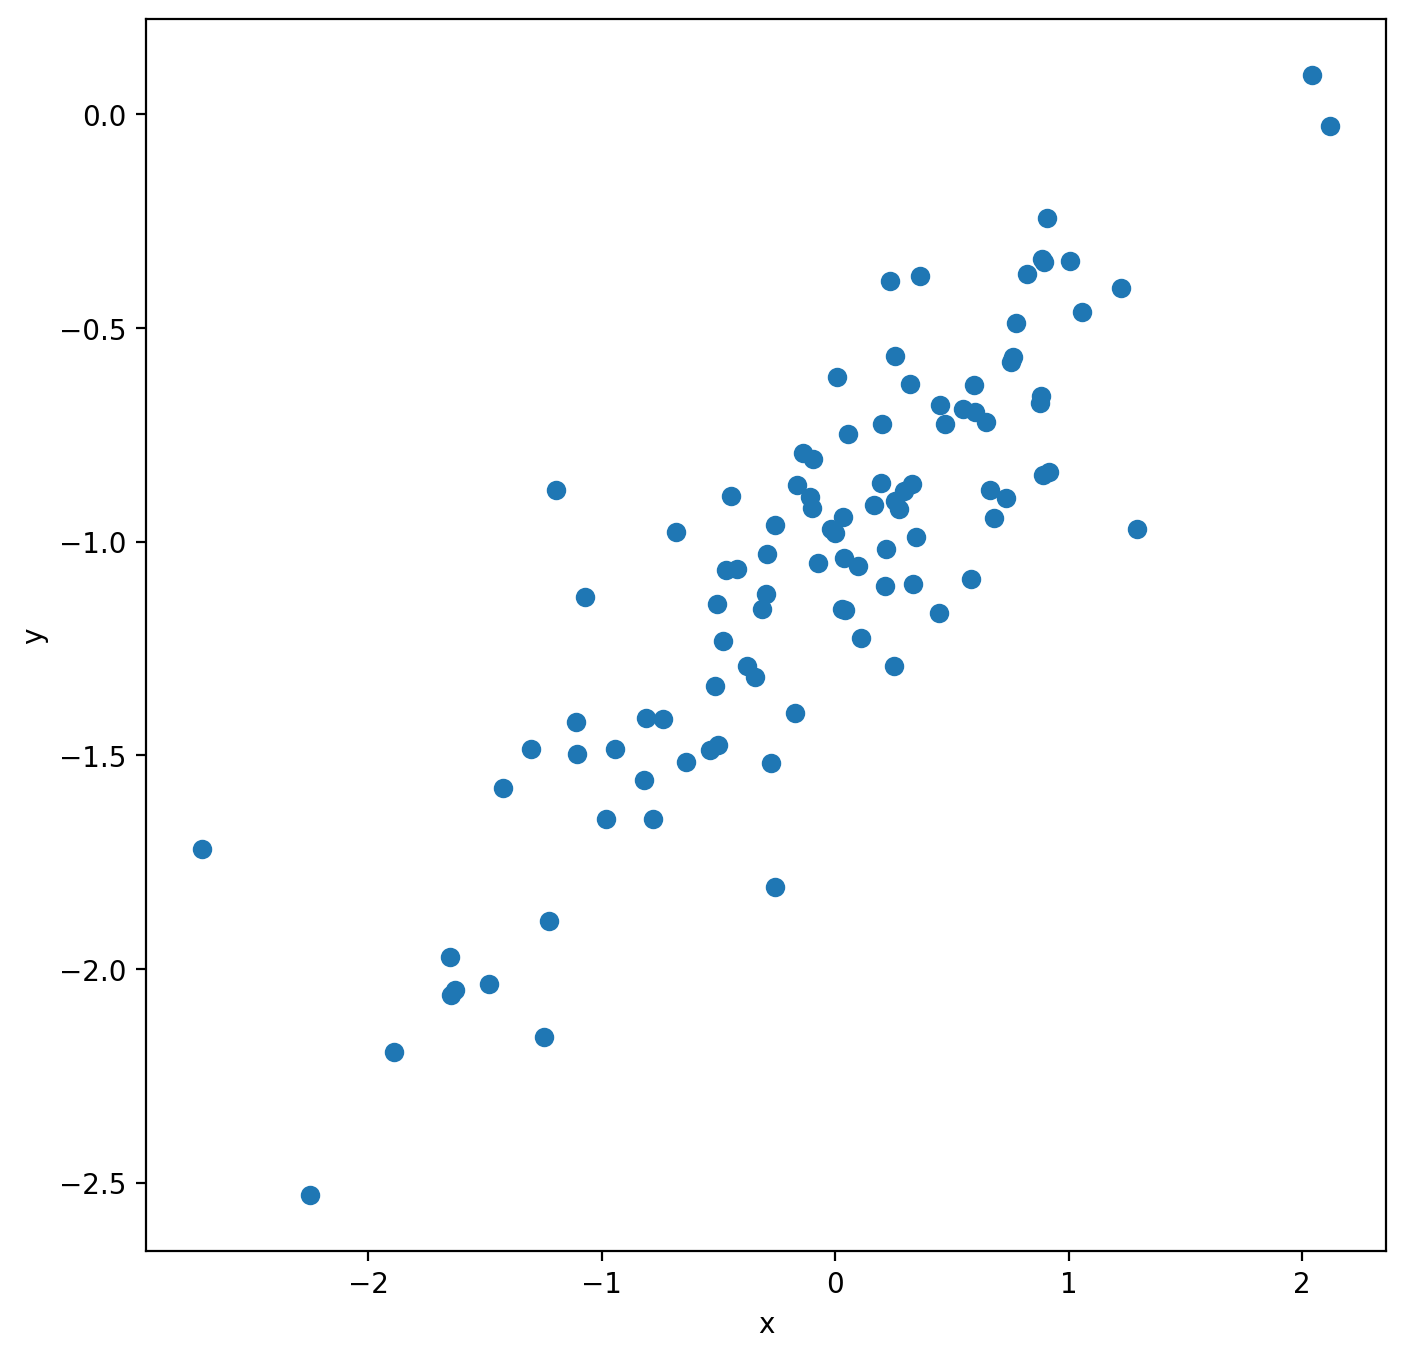

In [45]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y');

There is a strong linear relationship between x and y

(e)

In [46]:
X = pd.DataFrame({'intercept': np.ones_like(x),
                  'x': x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [47]:
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


$\hat{\beta_0} = -1.0190, \hat{\beta_1} = 0.4921$  
Very well estimated.

(f)

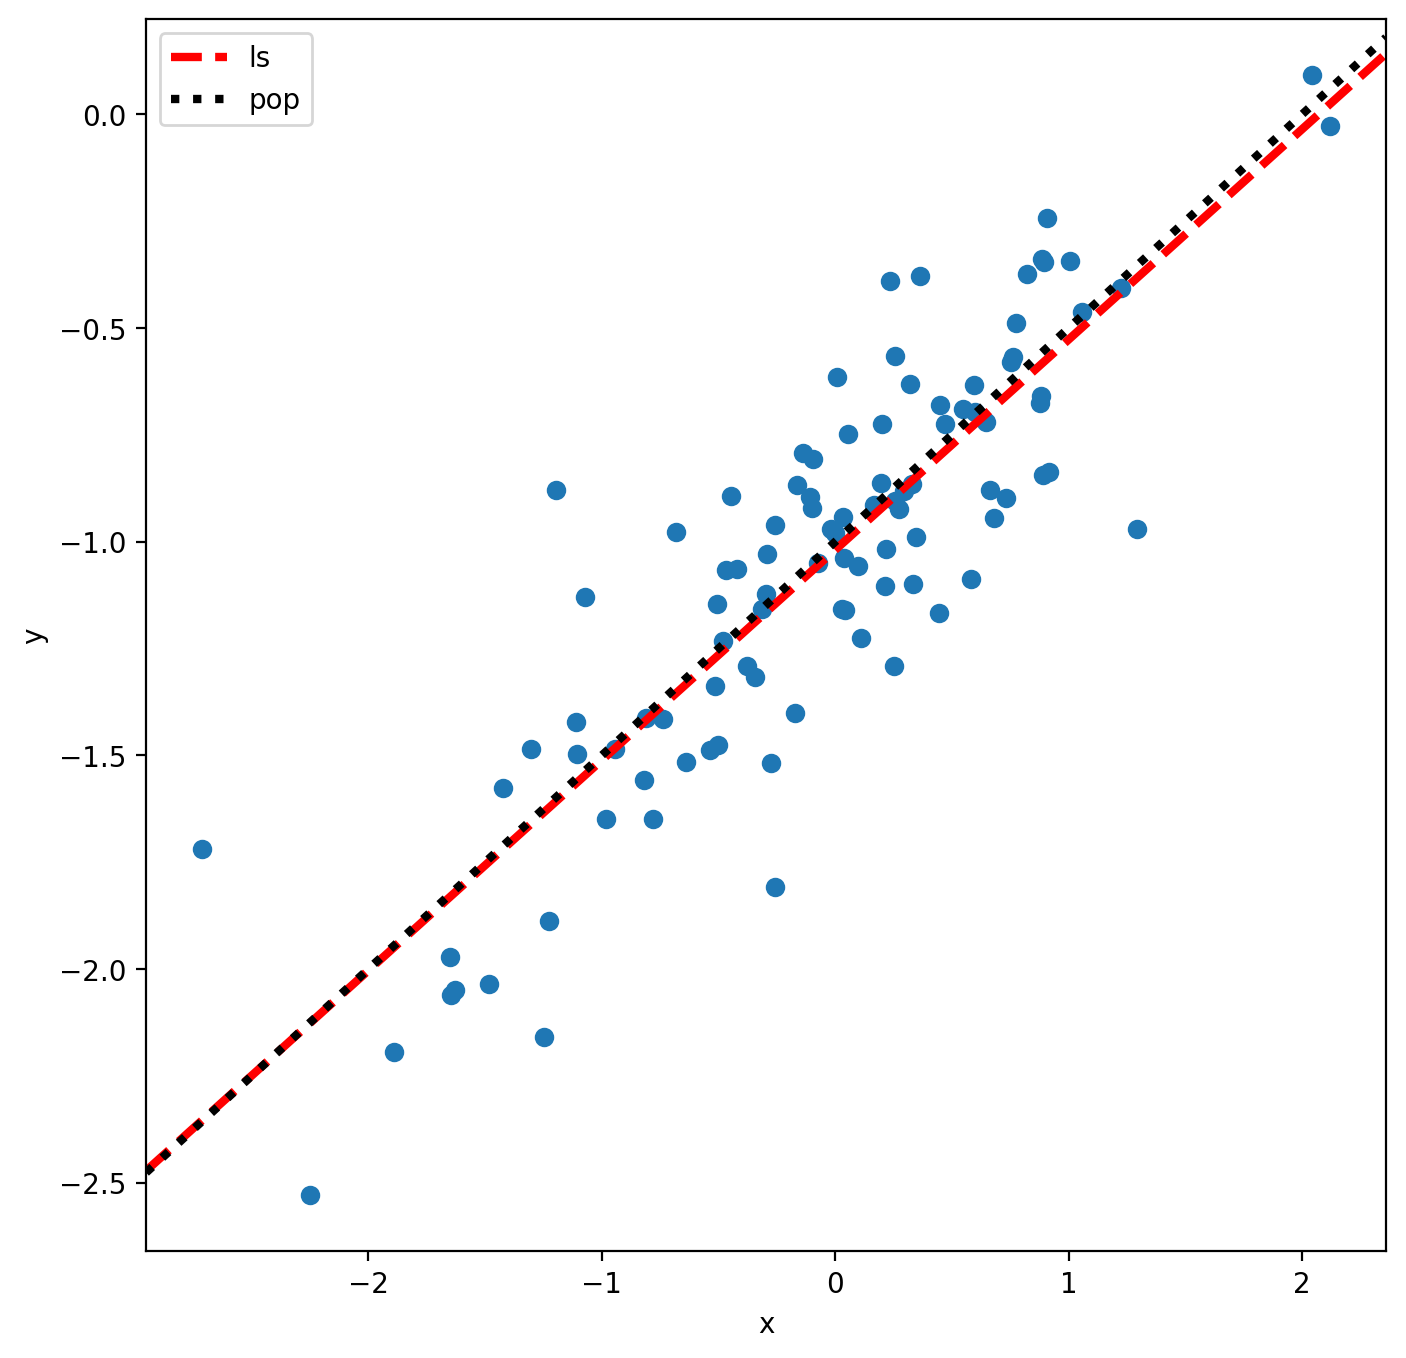

In [48]:
ax.axline((0, result.params.iloc[0]), slope=result.params.iloc[1], c='r', ls='--', linewidth=3, label='ls') # least squares line
ax.axline((0, -1), slope=0.5, c='k', ls=':', linewidth=3, label='pop') # population regression line
ax.legend();
fig

(g)

In [49]:
X_poly = MS([poly('x', degree=2)]).fit_transform(X)
X_poly


,intercept,"poly(x, degree=2)[0]","poly(x, degree=2)[1]"
0,1.0,0.049227,-0.036584
1,1.0,0.105129,0.034593
2,1.0,0.047448,-0.038177
3,1.0,-0.144388,0.032896
4,1.0,0.114962,0.051342
...,...,...,...
95,1.0,-0.255678,0.294791
96,1.0,-0.007638,-0.067043
97,1.0,0.012520,-0.061085
98,1.0,-0.158737,0.057565


In [50]:
result_poly = sm.OLS(y, X_poly).fit()
summarize(result_poly)

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(x, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(x, degree=2)[1]",-0.0131,0.252,-0.052,0.959


In [51]:
anova_lm(result, result_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,6.146642,0.0,NaN,NaN,NaN
1,97.0,6.146471,1.0,0.00017,0.002688,0.958757


p-value associated with degree 2 polynomial and p-value associated with F-statistic for new polynomial model are both large.  
 Hence there is no evidence that new model improves the performance.

(h)

In [52]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, size=100)

In [53]:
eps = rng.normal(0, 0.05, size=100)

In [54]:
y = -1 + 0.5 * x + eps
len(y)

100

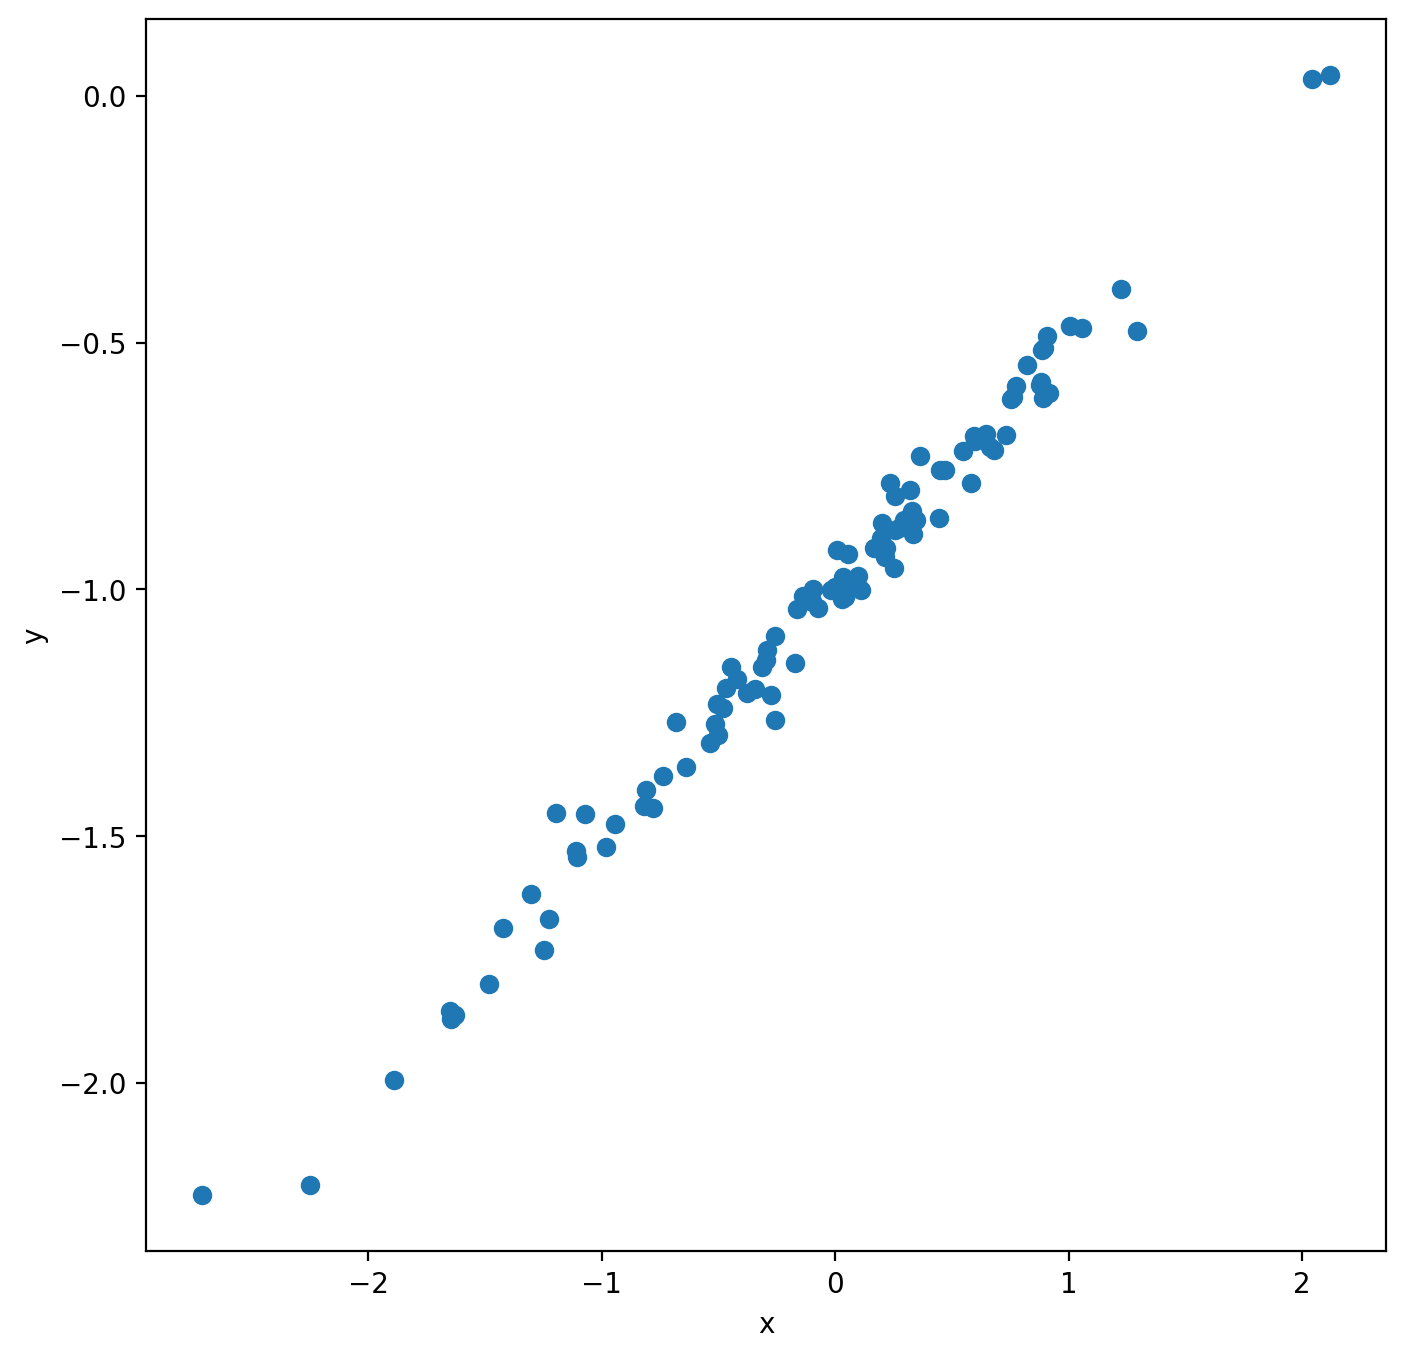

In [55]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y');

There is a strong linear relationship between x and y

In [56]:
X = pd.DataFrame({'intercept': np.ones_like(x),
                  'x': x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [57]:
result_ln = sm.OLS(y, X).fit()
summarize(result_ln)

,coef,std err,t,P>|t|
intercept,-1.0038,0.005,-199.662,0.0
x,0.4984,0.006,84.739,0.0


$\hat{\beta_0} = -1.0038, \hat{\beta_1} = 0.4984$  
Very well estimated.

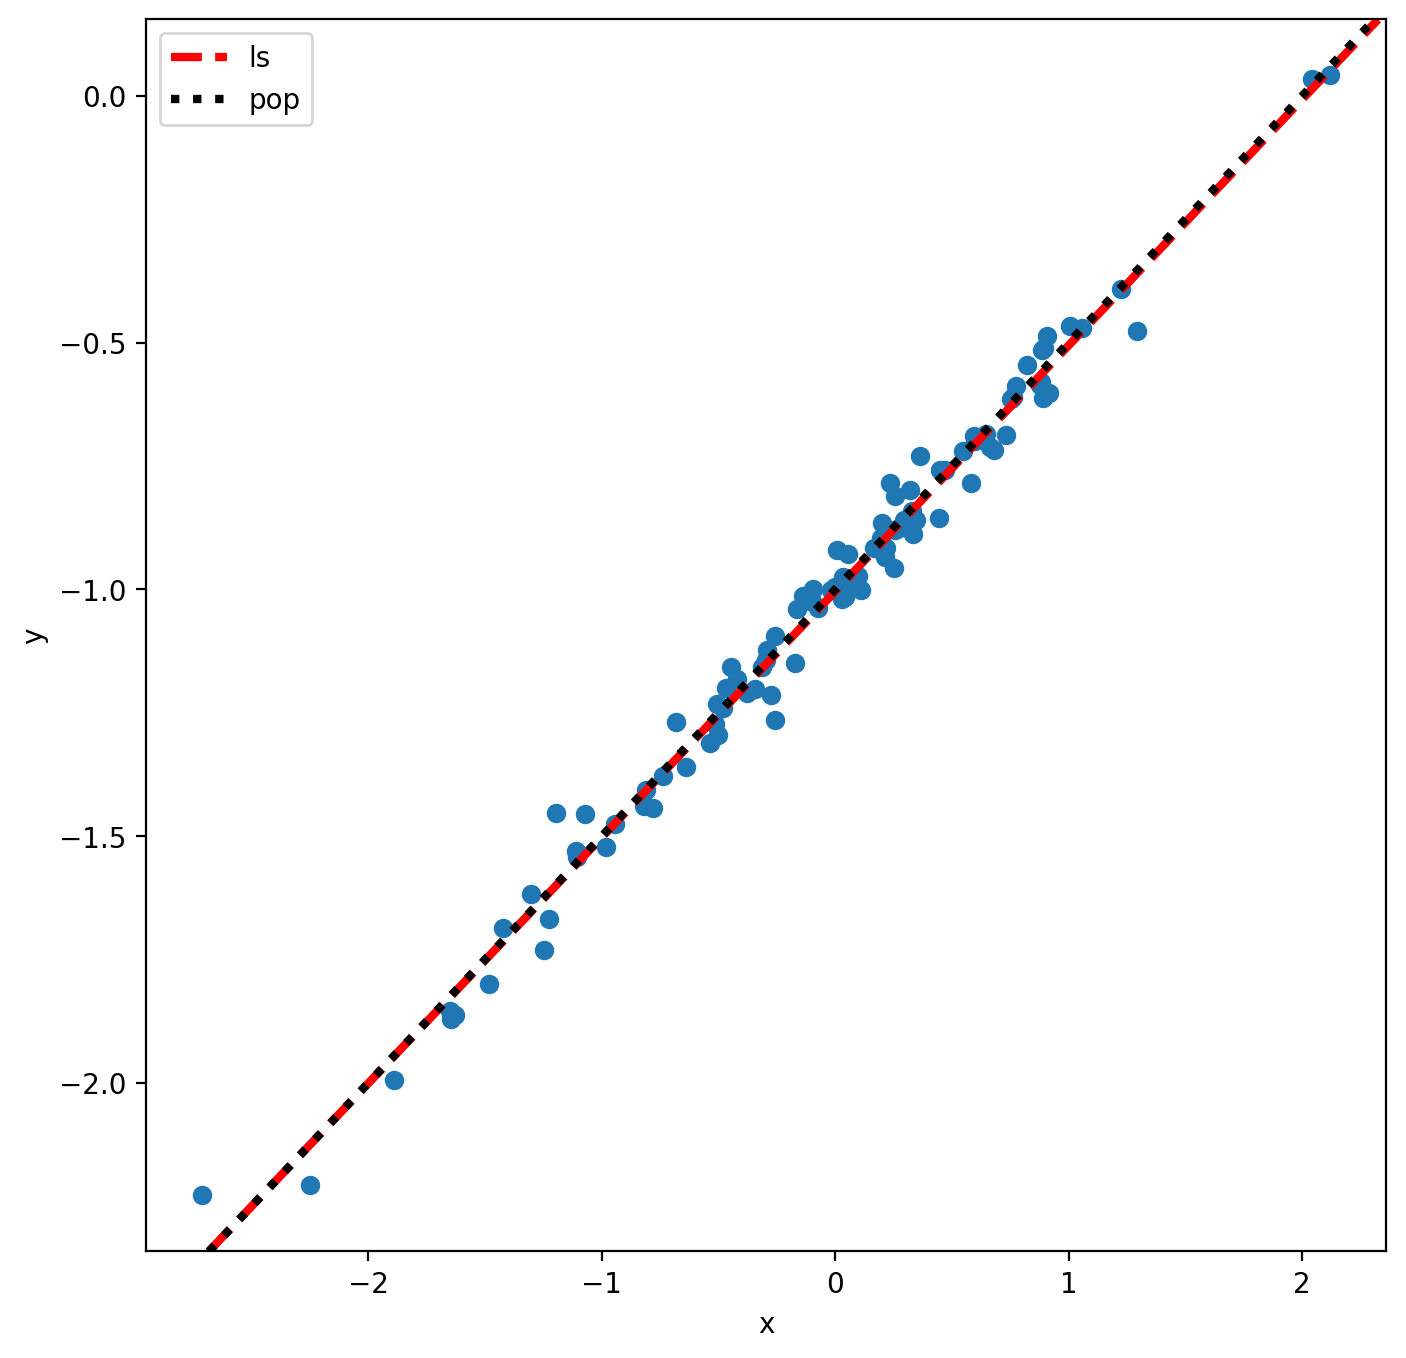

In [58]:
ax.axline((0, result_ln.params.iloc[0]), slope=result_ln.params.iloc[1], c='r', ls='--', linewidth=3, label='ls') # least squares line
ax.axline((0, -1), slope=0.5, c='k', ls=':', linewidth=3, label='pop') # population regression line
ax.legend();
fig

In [59]:
X_poly = MS([poly('x', degree=2)]).fit_transform(X)
X_poly


,intercept,"poly(x, degree=2)[0]","poly(x, degree=2)[1]"
0,1.0,0.049227,-0.036584
1,1.0,0.105129,0.034593
2,1.0,0.047448,-0.038177
3,1.0,-0.144388,0.032896
4,1.0,0.114962,0.051342
...,...,...,...
95,1.0,-0.255678,0.294791
96,1.0,-0.007638,-0.067043
97,1.0,0.012520,-0.061085
98,1.0,-0.158737,0.057565


In [60]:
result_poly = sm.OLS(y, X_poly).fit()
summarize(result_poly)

,coef,std err,t,P>|t|
intercept,-1.0405,0.005,-206.672,0.000
"poly(x, degree=2)[0]",4.2444,0.050,84.306,0.000
"poly(x, degree=2)[1]",-0.0026,0.050,-0.052,0.959


In [61]:
anova_lm(result_ln, result_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,0.245866,0.0,NaN,NaN,NaN
1,97.0,0.245859,1.0,0.000007,0.002688,0.958757


p-value associated with degree 2 polynomial and p-value associated with F-statistic for new polynomial model are both large.  
 Hence there is no evidence that new model improves the performance.

(i)

In [62]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, size=100)

In [63]:
eps = rng.normal(0, 1, size=100)

In [64]:
y = -1 + 0.5 * x + eps
len(y)

100

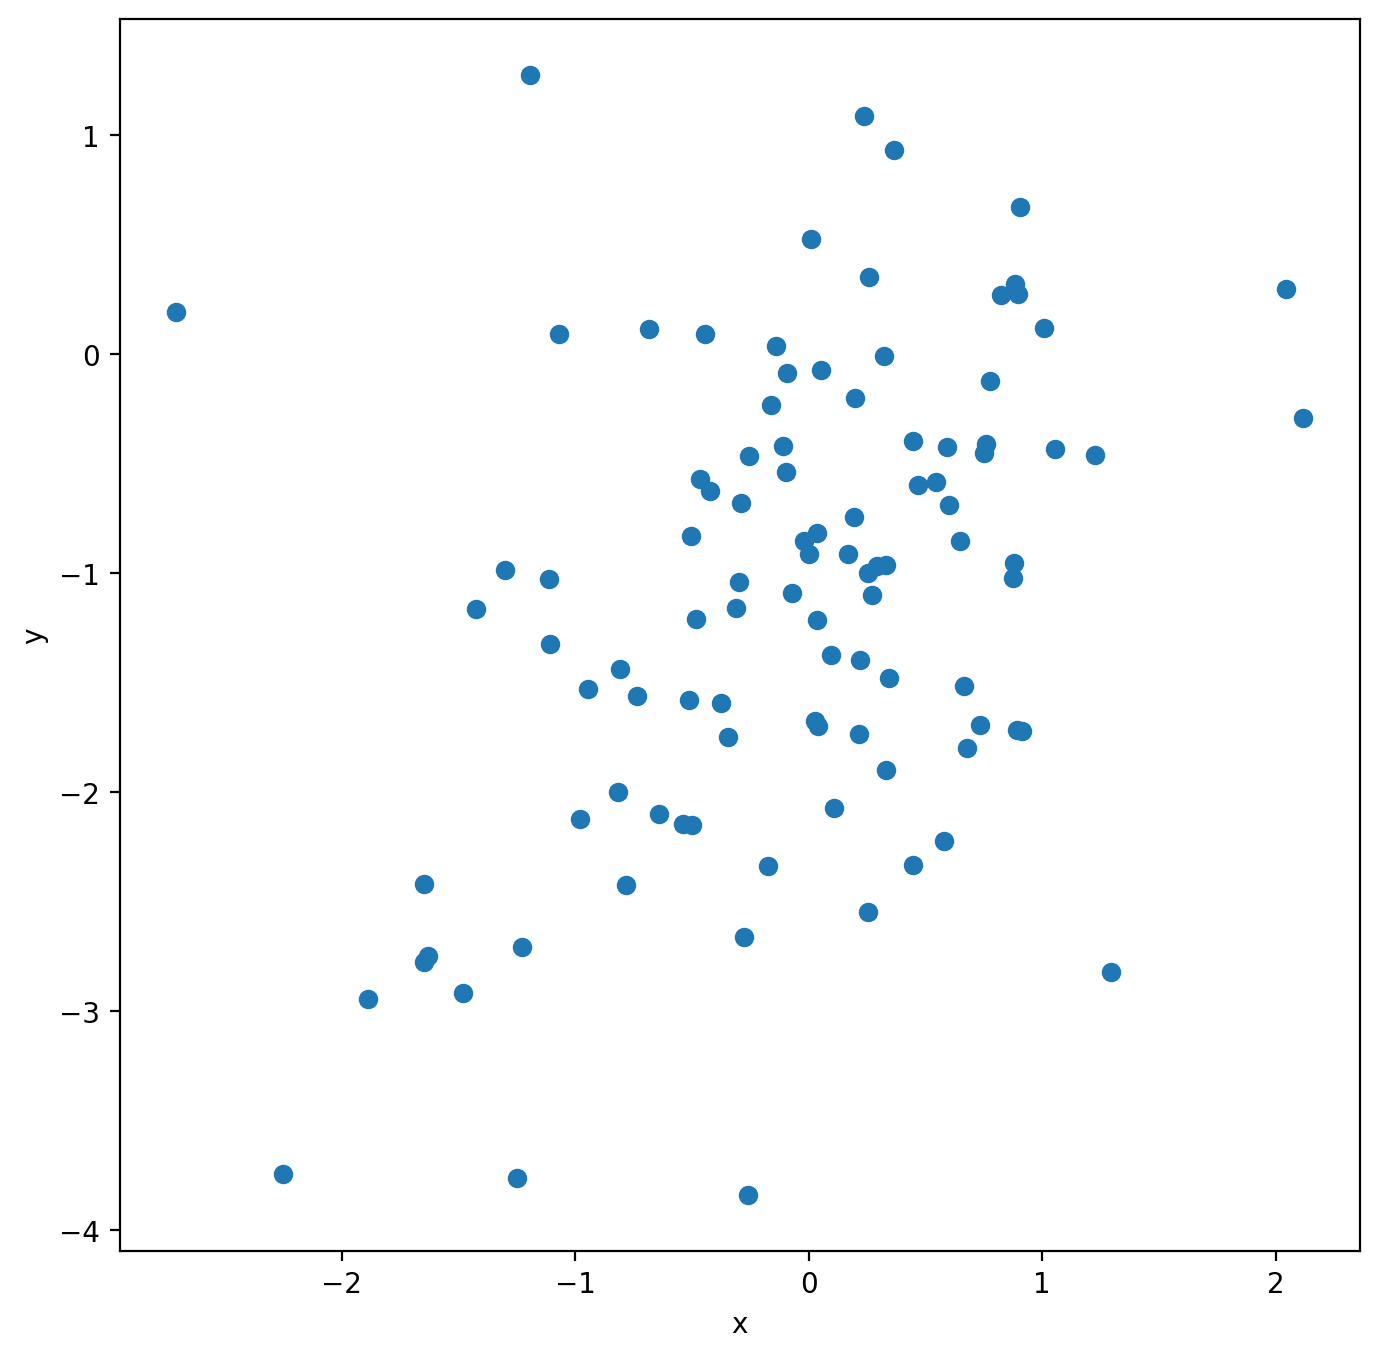

In [65]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y');

There is very much noise that we can't easily discern linear relationship

In [66]:
X = pd.DataFrame({'intercept': np.ones_like(x),
                  'x': x})
X

,intercept,x
0,1.0,0.345584
1,1.0,0.821618
2,1.0,0.330437
3,1.0,-1.303157
4,1.0,0.905356
...,...,...
95,1.0,-2.250854
96,1.0,-0.138655
97,1.0,0.033000
98,1.0,-1.425349


In [67]:
result_mn = sm.OLS(y, X).fit()
summarize(result_mn)

,coef,std err,t,P>|t|
intercept,-1.0760,0.101,-10.701,0.0
x,0.4686,0.118,3.983,0.0


$\hat{\beta_0} = -1.0760, \hat{\beta_1} = 0.4686$  
Estimation accuracy falls but is still good enough

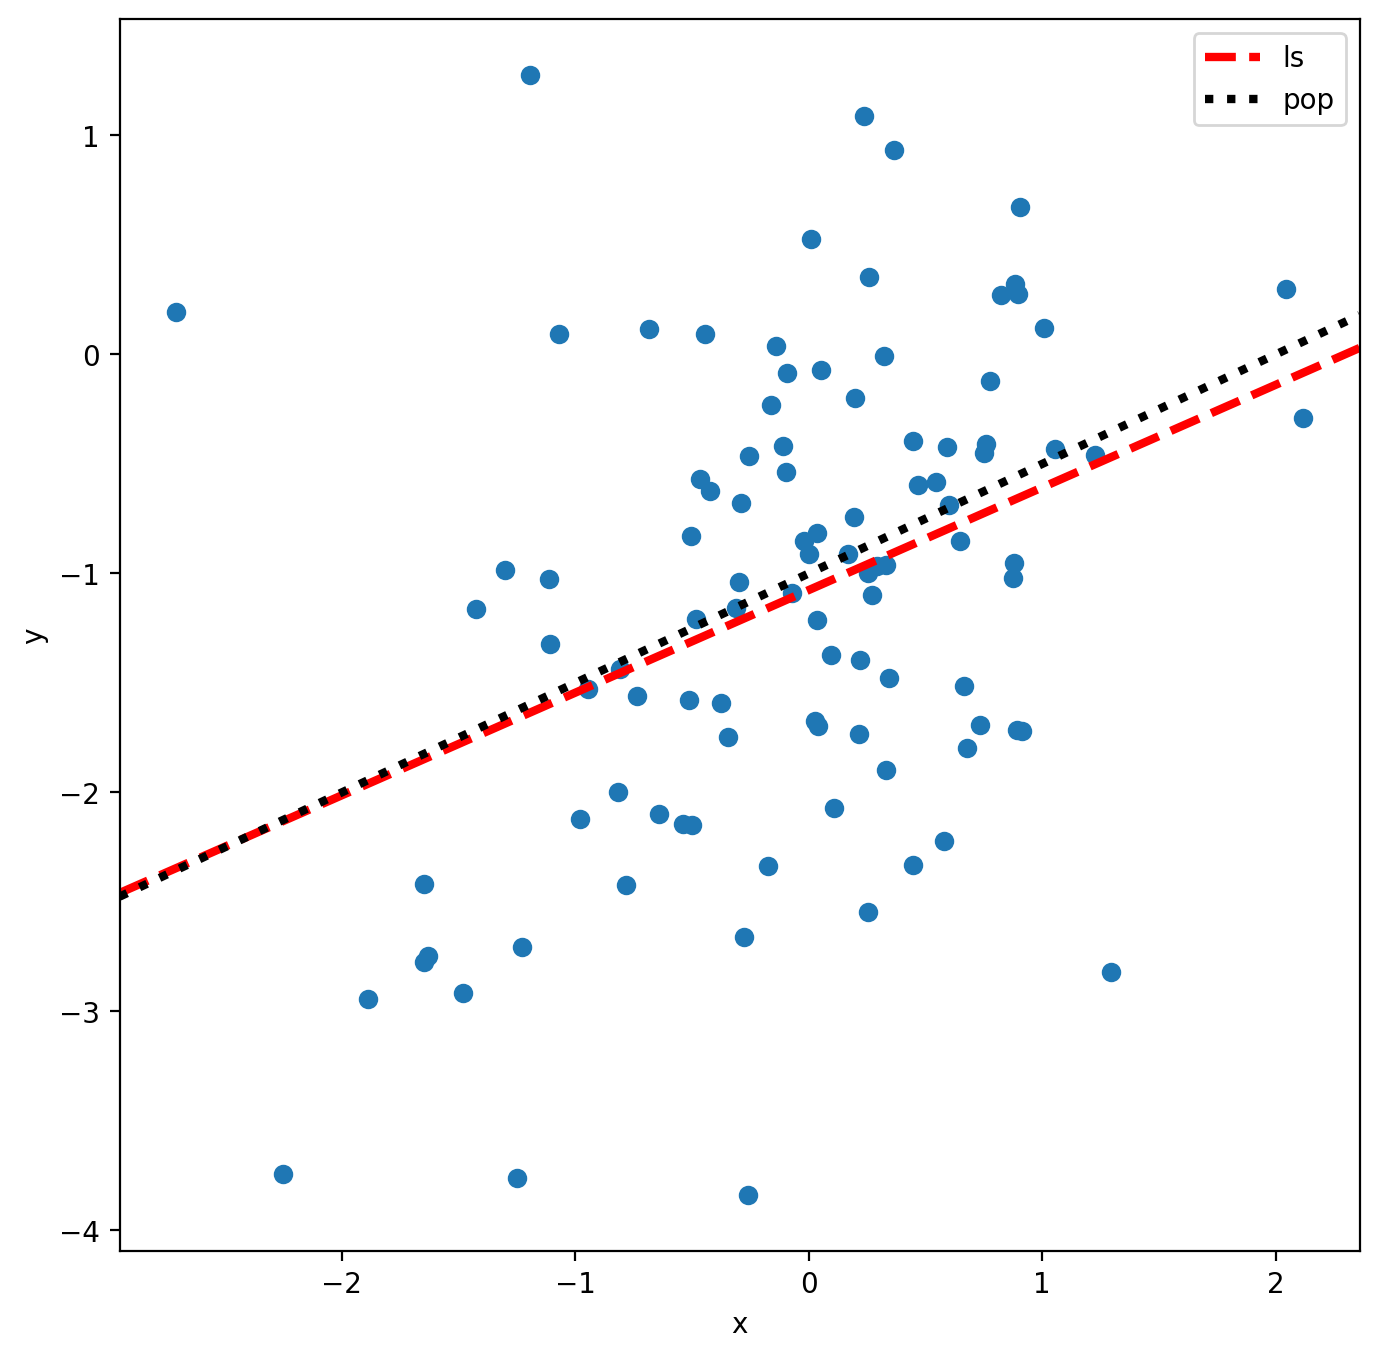

In [68]:
ax.axline((0, result_mn.params.iloc[0]), slope=result_mn.params.iloc[1], c='r', ls='--', linewidth=3, label='ls') # least squares line
ax.axline((0, -1), slope=0.5, c='k', ls=':', linewidth=3, label='pop') # population regression line
ax.legend();
fig

In [69]:
X_poly = MS([poly('x', degree=2)]).fit_transform(X)
X_poly


,intercept,"poly(x, degree=2)[0]","poly(x, degree=2)[1]"
0,1.0,0.049227,-0.036584
1,1.0,0.105129,0.034593
2,1.0,0.047448,-0.038177
3,1.0,-0.144388,0.032896
4,1.0,0.114962,0.051342
...,...,...,...
95,1.0,-0.255678,0.294791
96,1.0,-0.007638,-0.067043
97,1.0,0.012520,-0.061085
98,1.0,-0.158737,0.057565


In [70]:
result_poly = sm.OLS(y, X_poly).fit()
summarize(result_poly)

,coef,std err,t,P>|t|
intercept,-1.1105,0.101,-11.029,0.000
"poly(x, degree=2)[0]",3.9902,1.007,3.963,0.000
"poly(x, degree=2)[1]",-0.0522,1.007,-0.052,0.959


In [71]:
anova_lm(result_mn, result_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,98.346269,0.0,NaN,NaN,NaN
1,97.0,98.343544,1.0,0.002725,0.002688,0.958757


p-value associated with degree 2 polynomial and p-value associated with F-statistic for new polynomial model are both large.  
 Hence there is no evidence that new model improves the performance.

(j)

In [81]:
print('original:\n', result.conf_int(alpha=0.05))
print('noisier:\n', result_mn.conf_int(alpha=0.05))
print('less noisy:\n', result_ln.conf_int(alpha=0.05))

original:
                   0         1
intercept -1.068891 -0.969122
x          0.433783  0.550508
noisier:
                   0         1
intercept -1.275564 -0.876487
x          0.235131  0.702033
less noisy:
                   0         1
intercept -1.013778 -0.993824
x          0.486757  0.510102


The larger the noise is, the wider the confidence intervals, which is plausible since if the data is noisy, then our confidence associated with estimating the coefficients would decrease.

### 14.

(a)

In [165]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

$$
Y = 2 + 2 X_1 + 0.3 X_2 + \epsilon
$$
$\beta_0 = 2, \beta_1 = 2, \beta_2 = 0.3$ 

(b)

In [166]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

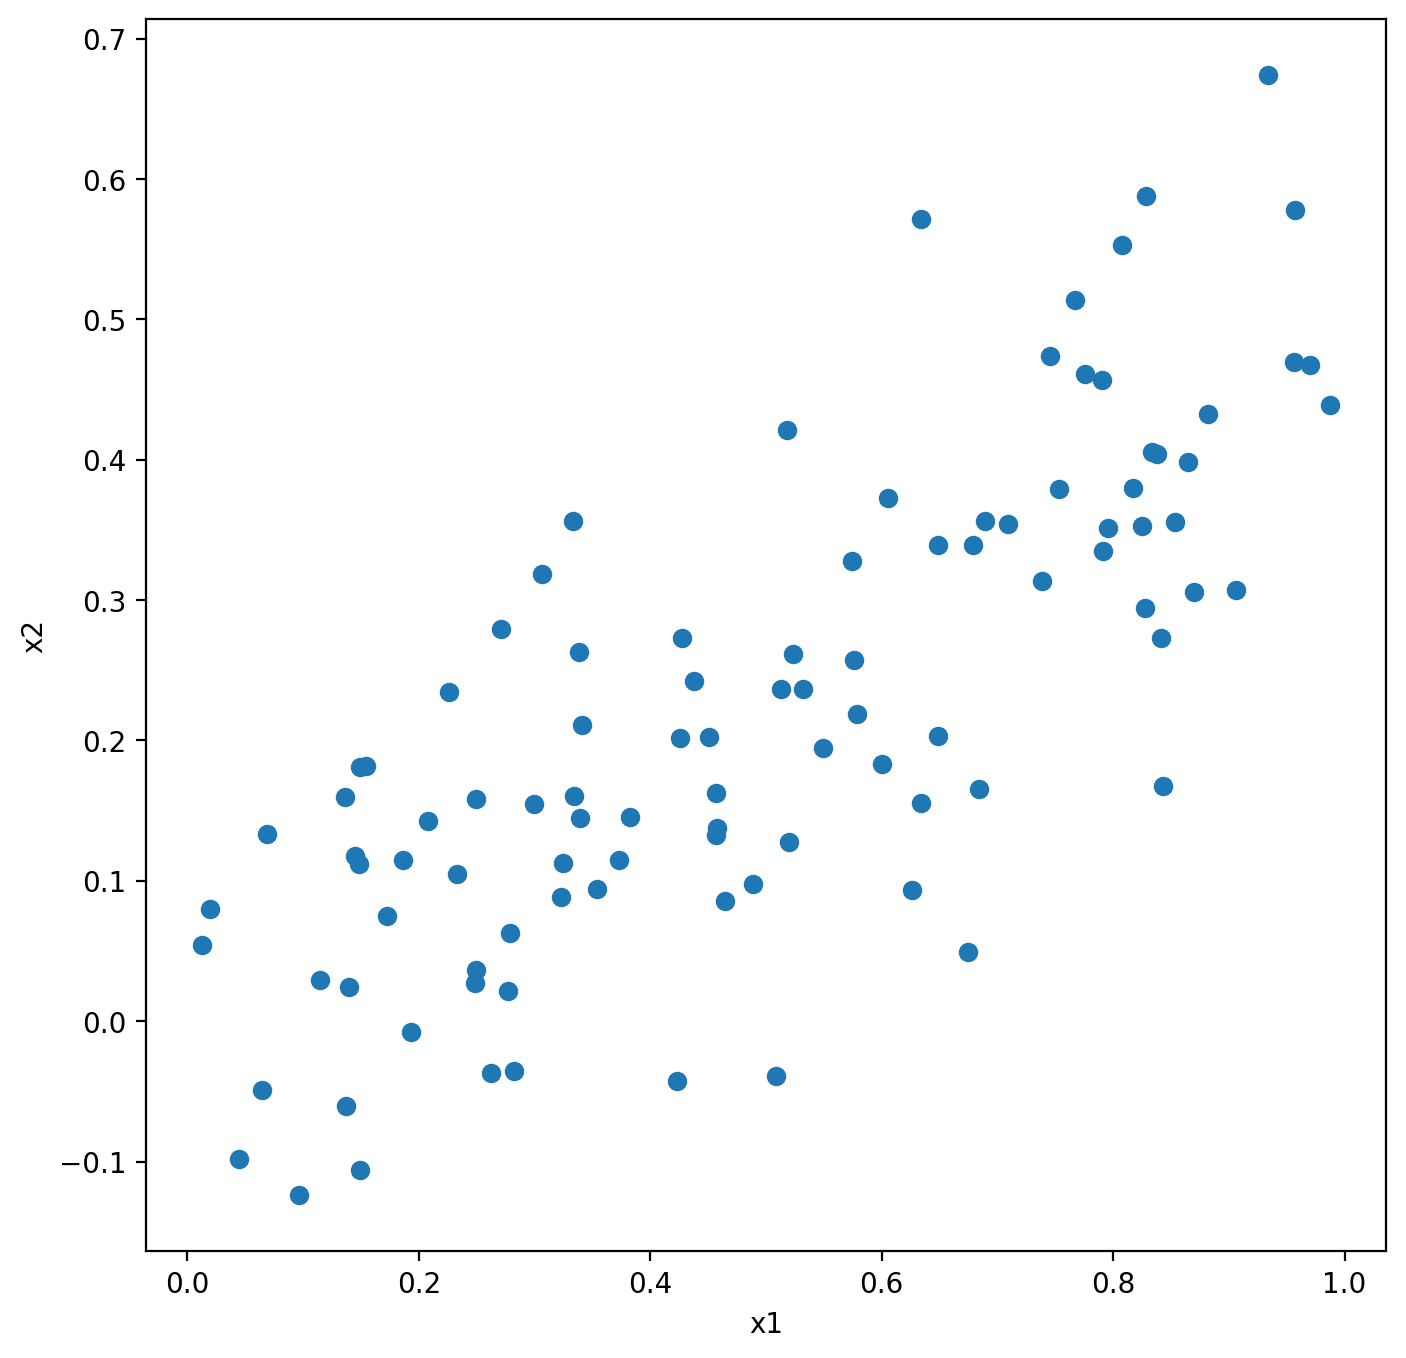

In [167]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(x1, x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2');

(c)

In [168]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x1': x1,
                  'x2': x2})
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


$\hat{\beta_0} = 1.9579, \hat{\beta_1} = 1.6154, \hat{\beta_2} = 0.9428$

$\hat{\beta_0}, \hat{\beta_1}$ is statistically significant, but $\hat{\beta_2}$ is not. Also, only intercept is estimated well, and other coefficients are poorly estimated due to collinearity.

(d)

In [169]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x1': x1})
result2 = sm.OLS(y, X).fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


Now we can reject the null hypothesis H_0 : beta_1 = 0.

(e)

In [170]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x2': x2})
result3 = sm.OLS(y, X).fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


Now we can reject the null hypothesis H_0 : beta_2 = 0, though the coefficient is poorly estimated.

(f)

In (c), we coudln't reject the null hypothesis H0: beta2 = 0, but in (e) we could.  
When we substitute one of x1 or x2 to another in equation (1), we get the reason why the coefficient increased in simple linear regression.  
This is due to the collinearity between x1 and x2. The collinearity makes the standard error large, thus making rejecting the null hypothesis difficult.

(g)

In [171]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [172]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x1': x1,
                  'x2': x2})
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


$\hat{\beta_0} = 2.0618, \hat{\beta_1} = 0.8575, \hat{\beta_2} = 2.2663$

$\hat{\beta_0}, \hat{\beta_2}$ is statistically significant, but $\hat{\beta_1}$ is not. Also, only intercept is estimated well, and other coefficients are poorly estimated due to collinearity.

In [173]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x1': x1})
result2 = sm.OLS(y, X).fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


Now we can reject the null hypothesis H_0 : beta_1 = 0.

In [174]:
X = pd.DataFrame({'intercept': np.ones_like(x1),
                  'x2': x2})
result3 = sm.OLS(y, X).fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


Now we can reject the null hypothesis H_0 : beta_2 = 0.

This change in observation results in the decrease in beta1 and increase in beta2.

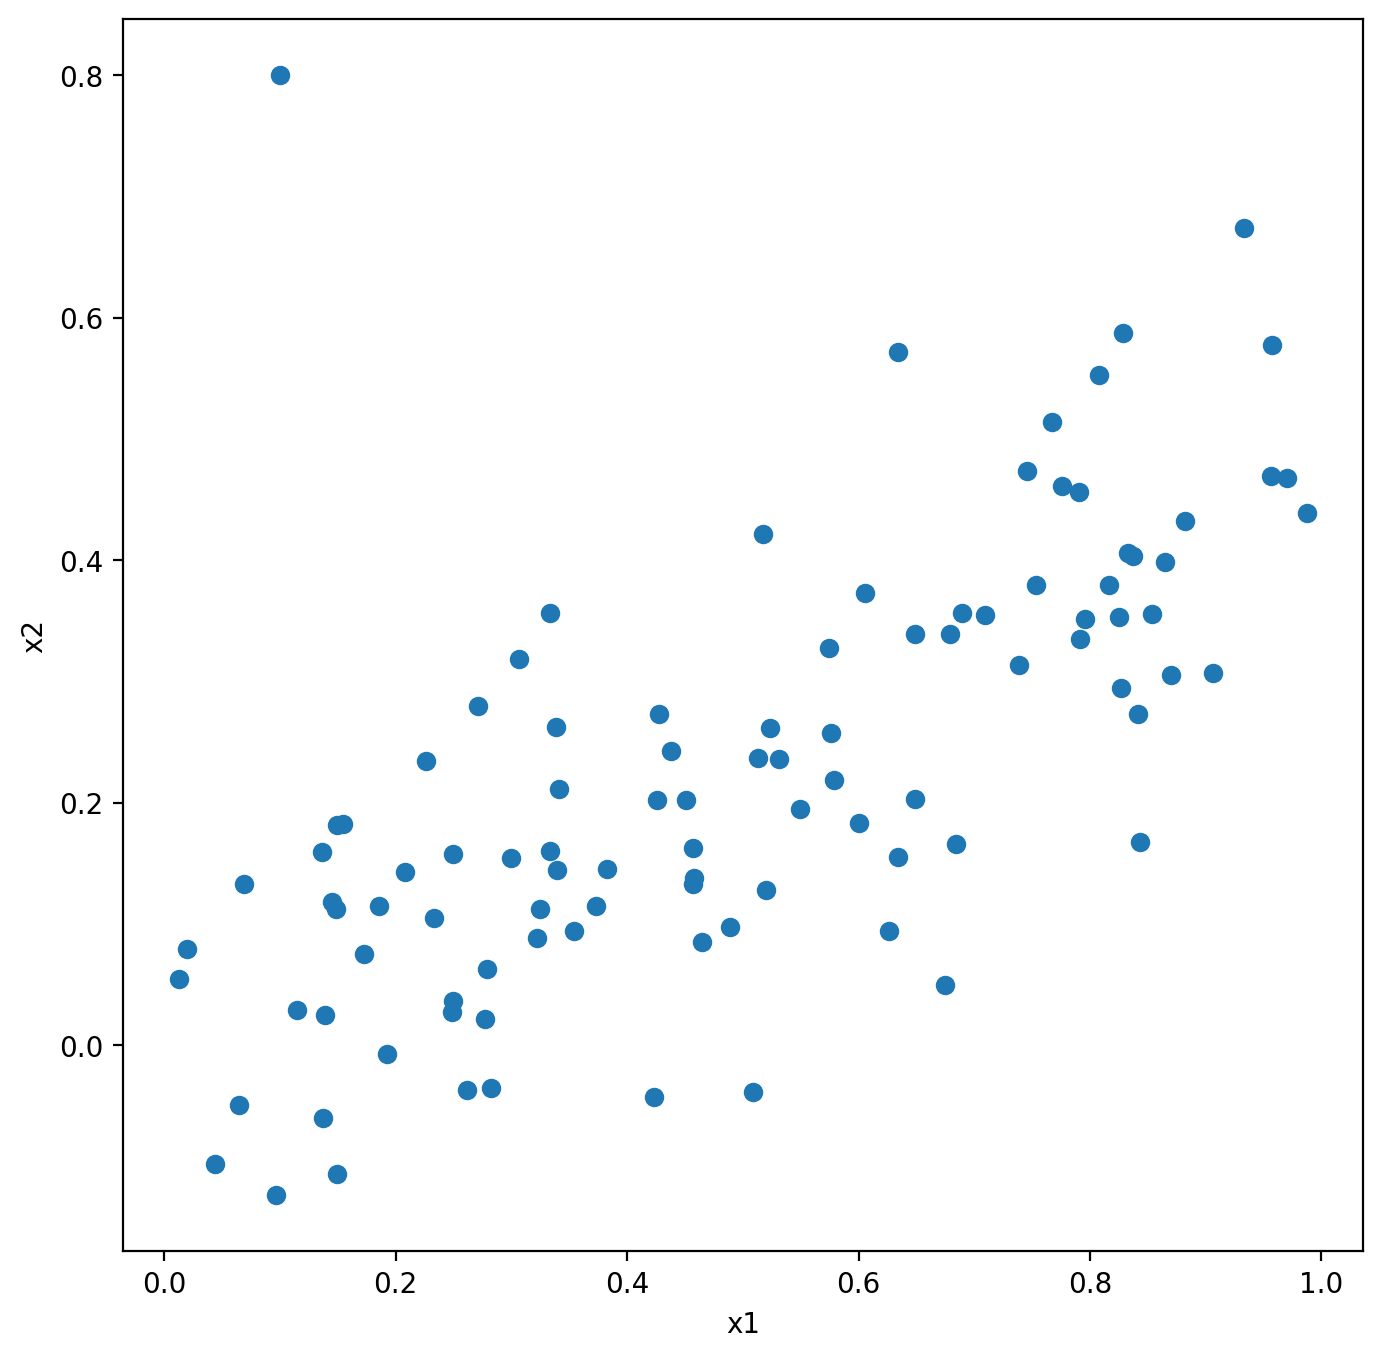

In [177]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(x1, x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2');

100

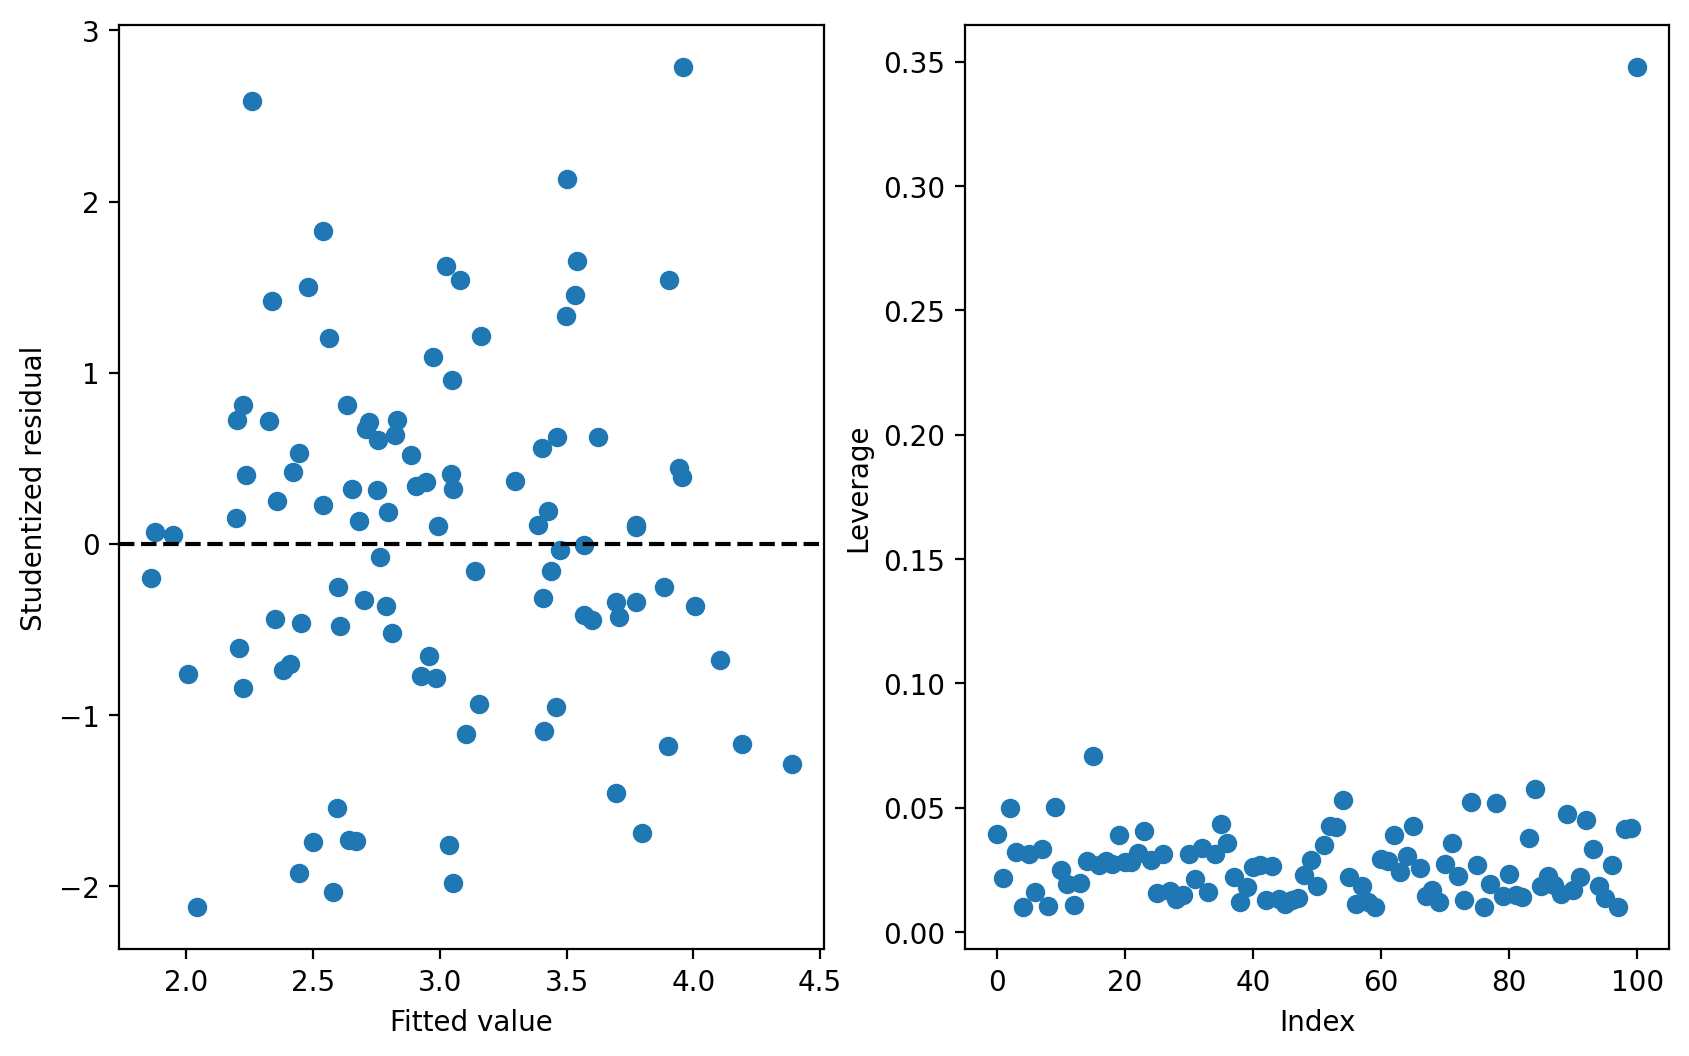

In [175]:
axes = subplots(figsize=(10, 6), ncols=2)[1]

ax1 = axes[0]
ax1.scatter(result.fittedvalues, result.outlier_test()['student_resid'])
ax1.set_xlabel('Fitted value')
ax1.set_ylabel('Studentized residual')
ax1.axhline(0, c='k', ls='--')

ax2 = axes[1]
ax2.scatter(np.arange(X.shape[0]), result.get_influence().hat_matrix_diag)
ax2.set_xlabel('Index')
ax2.set_ylabel('Leverage')
np.argmax(result.get_influence().hat_matrix_diag)

There seems to be a outlier(though |studentized residual| is within 3), and one high-leverage point, which is lastly added observation.

### 15.

In [100]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [101]:
y = Boston['crim']
y

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: crim, Length: 506, dtype: float64

(a)

In [102]:
allvar = Boston.columns.drop('crim')
allvar

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

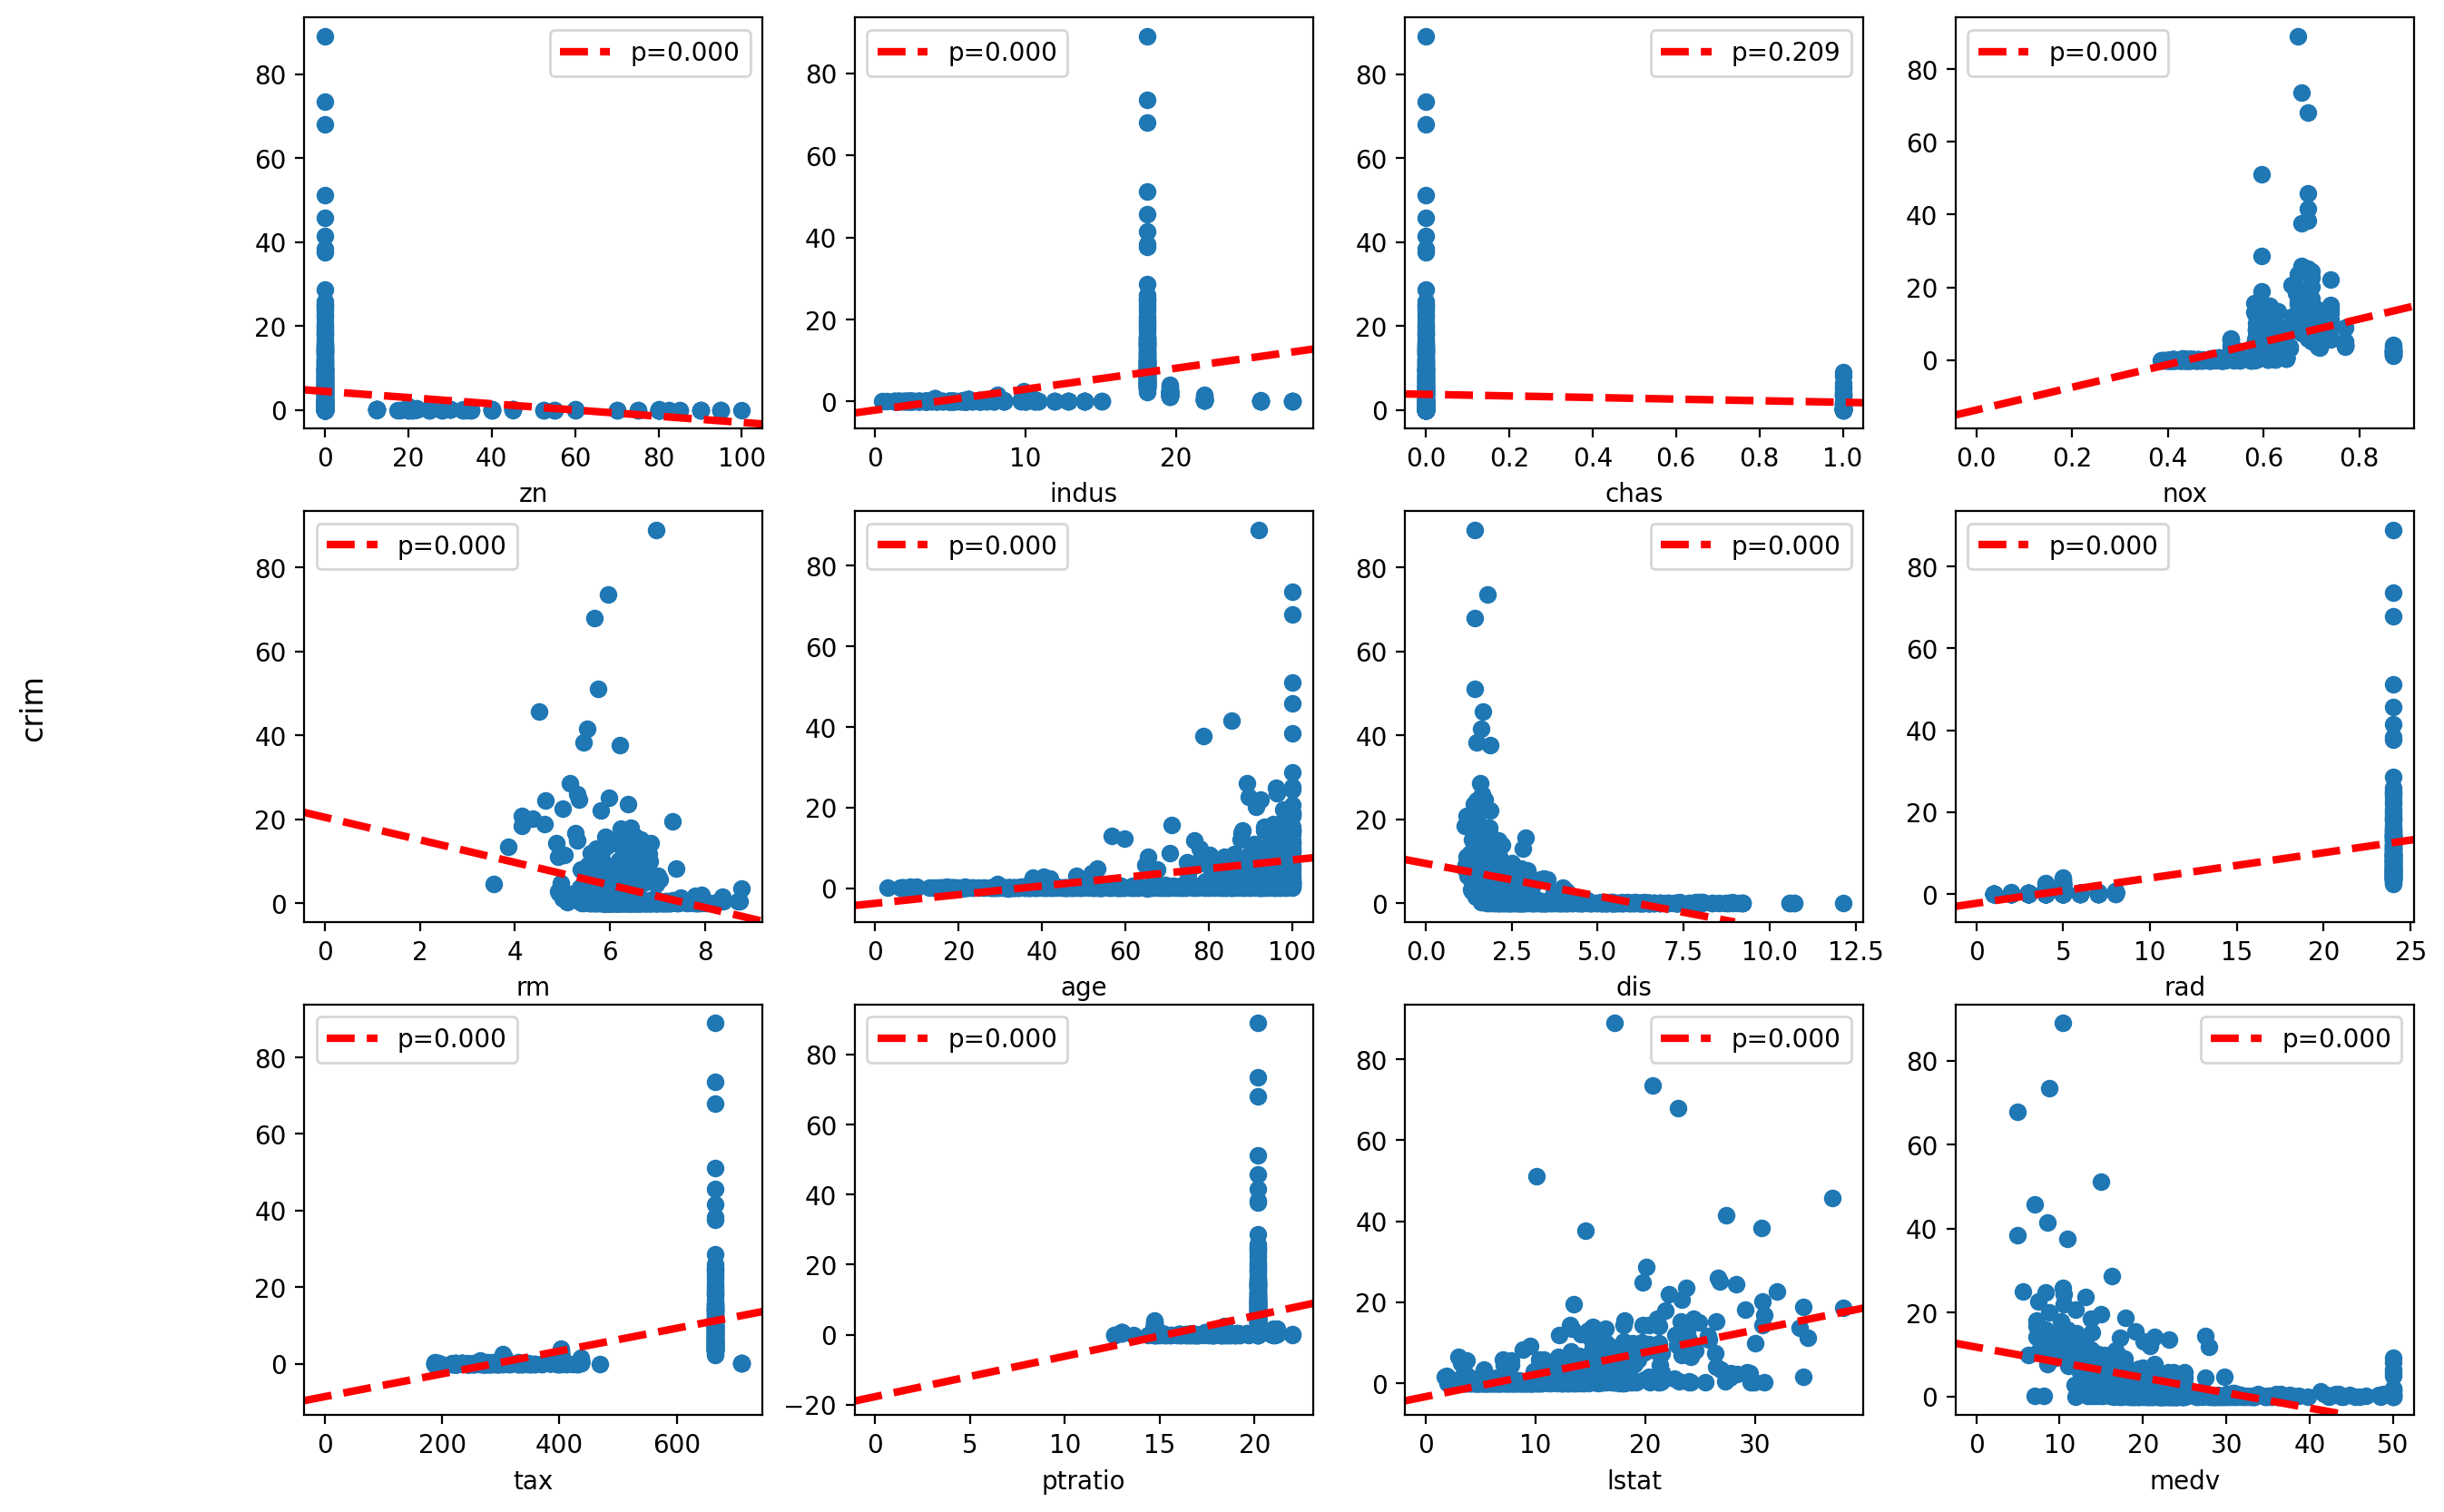

In [130]:
results = {}
fig, axes = subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, var_name in enumerate(allvar):
    # fitting model and printing summary
    X = MS([var_name]).fit_transform(Boston)
    result = sm.OLS(y, X).fit()
    results[var_name] = result
    print(summarize(result))

    # plotting scatter plot and least squares regression line
    ax = axes[i//4][i%4]
    ax.scatter(X[var_name], y)
    ax.set_xlabel(var_name)
    ax.axline((0, result.params.iloc[0]), slope=result.params.iloc[1], c='r', ls='--', linewidth=3, label='p={:.3f}'.format(result.pvalues.iloc[1]))
    ax.legend()
fig.supylabel('crim');

all variables except for chas.

(b)

In [131]:
X = MS(allvar).fit_transform(Boston)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


"zn, dis, rad, medv" after adjusting variables.

(c)

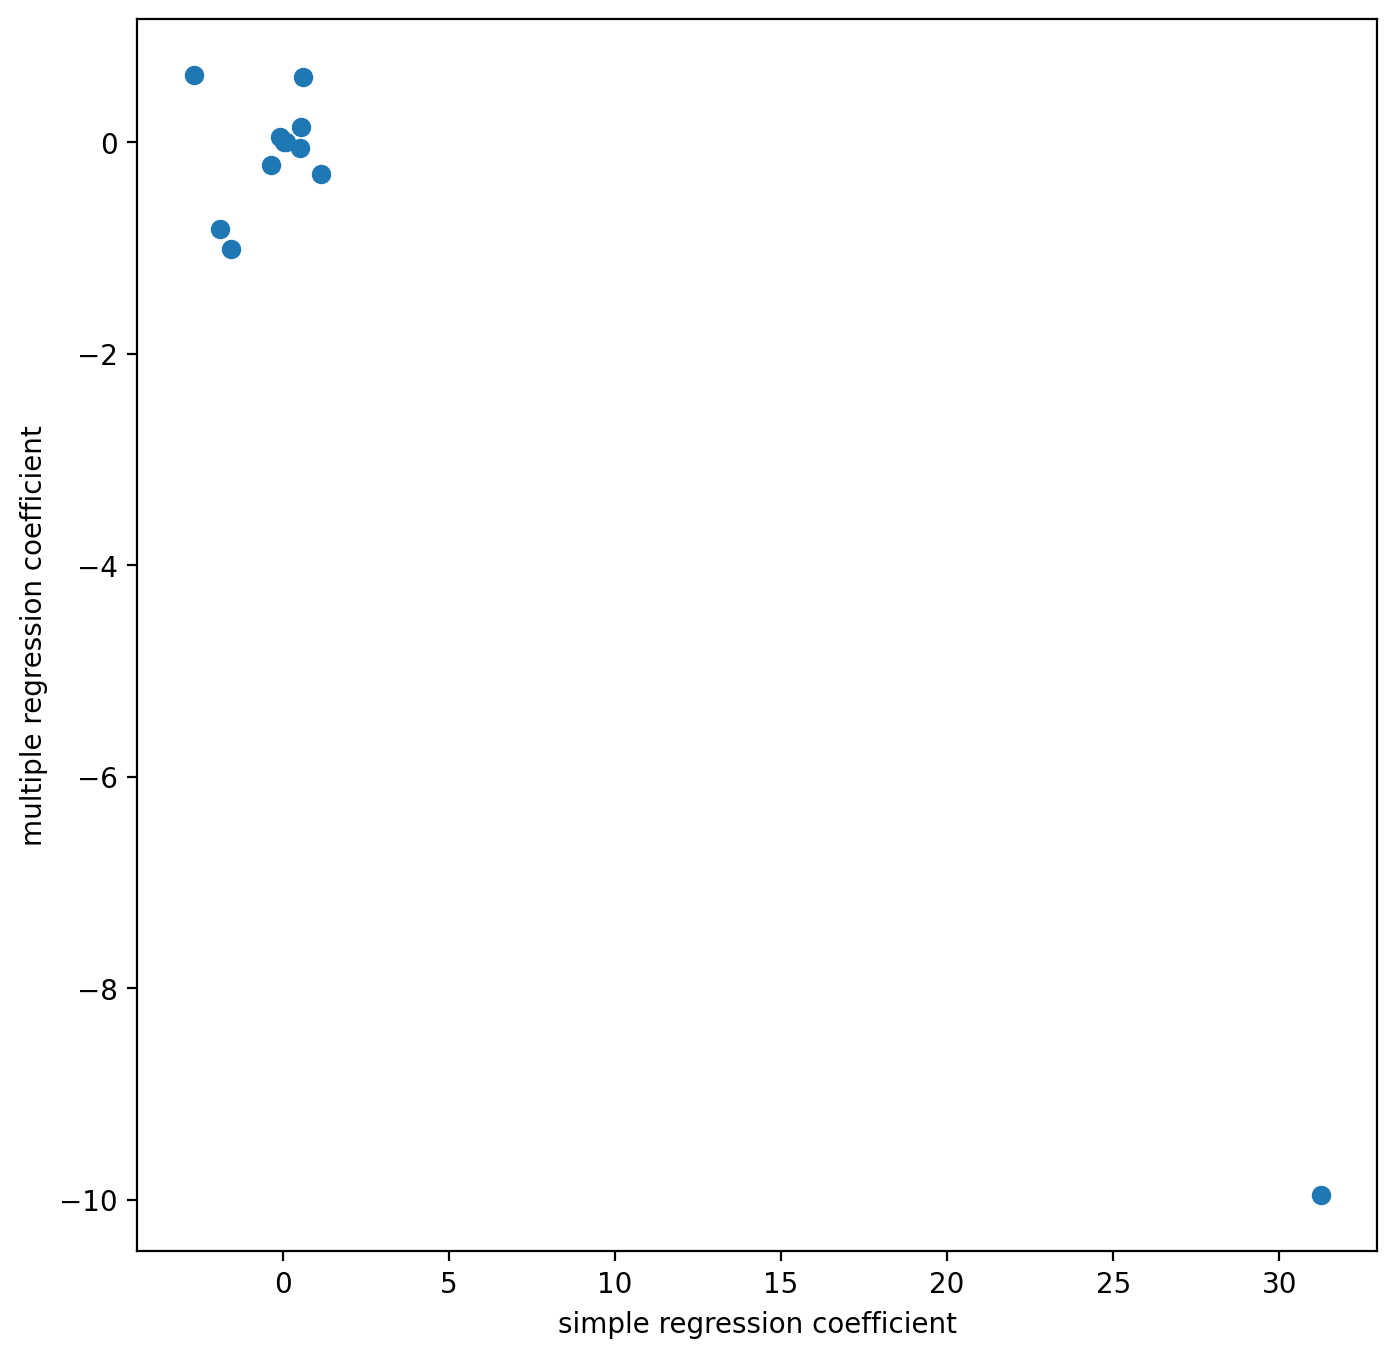

In [144]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter([result_sim.params.values[1] for result_sim in results.values()], result.params.values[1:])
ax.set_xlabel('simple regression coefficient')
ax.set_ylabel('multiple regression coefficient');

The two coefficients set are very different.

(d)

In [148]:
results = {}
for i, var_name in enumerate(allvar):
    # fitting simple polynomial regression model and printing summary
    X = MS([poly(var_name, degree=3)]).fit_transform(Boston)
    result = sm.OLS(y, X).fit()
    results[var_name] = result
    print(summarize(result))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
                           coef  std err      t  P>|t|
intercept                3.7414    0.396  9.454  0.000
poly(chas, degree=3)[0] -0.0569    0.012 -4.939  0.000
poly(chas, degree=3)[1] -0.0988    0.014 -6.891  0.000
poly(chas, degree=3)[2] -0.3508    0.282 -1.242  0.215
                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11.249    0

There are non-linearities:  
zn, chas, rm, rad, tax, lstat : second order  
others: third order  